## Final Project Submission

Please fill out:
* Student name: __Scott Okamura__
* Student pace: ___self paced___ / part time / full time
* Scheduled project review date/time: __12/7/2020 9:30 AM HST__
* Instructor name: __Jeff Herman__
* Blog post URL:


# Problem Background

League of Legends (LoL) is a multiplayer online game made in 2009. The professional scene of LoL has leagues across the globe, separated by geographic regions. The culminating event that occurs after most of the regions have completed their summer season is the World Championship. This year-end tournament is held annually and teams must qualify in their own respective regions in order to participate. Any team that can qualify for this tournament is already considered successful. However, only one of those teams can win the tournament.

# Business Case

Professional League of Legends, although not the highest paid esport, has many opportunities for businesses to make a profit. The data that the game collects can be used by coaching staff who are looking to make data-driven changes and adjustments to the way their team plays. This notebook will design a model to predict the winner of the World Championship tournament. This is less likely to be used by coaches but can be used by fans and legal betting sites.

# Importing Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
import sys

from sklearn import model_selection
from sklearn.model_selection import train_test_split as tts
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier


from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score, roc_auc_score
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc
from cf_matrix import make_confusion_matrix

In [3]:
pd.options.display.max_columns = 200
pd.options.display.max_rows = 50

# Importing Data

In [4]:
df = pd.read_csv('2020_LoL_esports_match_data_from_OraclesElixir_20201006.csv')
df.head()

,gameid,datacompleteness,url,league,year,split,playoffs,date,game,patch,playerid,side,position,player,team,champion,ban1,ban2,ban3,ban4,ban5,gamelength,result,kills,deaths,assists,teamkills,teamdeaths,doublekills,triplekills,quadrakills,pentakills,firstblood,firstbloodkill,firstbloodassist,firstbloodvictim,team kpm,ckpm,firstdragon,dragons,opp_dragons,elementaldrakes,opp_elementaldrakes,infernals,mountains,clouds,oceans,dragons (type unknown),elders,opp_elders,firstherald,heralds,opp_heralds,firstbaron,barons,opp_barons,firsttower,towers,opp_towers,firstmidtower,firsttothreetowers,inhibitors,opp_inhibitors,damagetochampions,dpm,damageshare,damagetakenperminute,damagemitigatedperminute,wardsplaced,wpm,wardskilled,wcpm,controlwardsbought,visionscore,vspm,totalgold,earnedgold,earned gpm,earnedgoldshare,goldspent,gspd,total cs,minionkills,monsterkills,monsterkillsownjungle,monsterkillsenemyjungle,cspm,goldat10,xpat10,csat10,opp_goldat10,opp_xpat10,opp_csat10,golddiffat10,xpdiffat10,csdiffat10,goldat15,xpat15,csat15,opp_goldat15,opp_xpat15,opp_csat15,golddiffat15,xpdiffat15,csdiffat15
0,ESPORTSTMNT03/1241318,complete,http://matchhistory.na.leagueoflegends.com/en/...,KeSPA,2020,NaN,0,2020-01-03 07:33:26,1,9.24,1,Blue,top,Summit,SANDBOX Gaming,Rumble,LeBlanc,Irelia,Rek'Sai,Yasuo,Renekton,2220,1,0,3,7,17,11,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.4595,0.7568,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0.0,15431,417.0541,0.198651,464.6216,488.2162,23,0.6216,3,0.0811,10,35.0,0.9459,13302,8498,229.6757,0.189235,11350.0,NaN,285.0,276.0,9,5,0,7.7027,3348.0,4864.0,88.0,2845.0,4432.0,65.0,503.0,432.0,23.0,4888.0,7368.0,131.0,4723.0,7202.0,118.0,165.0,166.0,13.0
1,ESPORTSTMNT03/1241318,complete,http://matchhistory.na.leagueoflegends.com/en/...,KeSPA,2020,NaN,0,2020-01-03 07:33:26,1,9.24,2,Blue,jng,OnFleek,SANDBOX Gaming,Elise,LeBlanc,Irelia,Rek'Sai,Yasuo,Renekton,2220,1,4,0,9,17,11,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.4595,0.7568,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,11294,305.2432,0.145393,541.0541,289.1351,47,1.2703,26,0.7027,17,102.0,2.7568,13484,8680,234.5946,0.193288,12175.0,NaN,210.0,40.0,170,130,0,5.6757,2895.0,2887.0,57.0,3093.0,3010.0,67.0,-198.0,-123.0,-10.0,4385.0,4817.0,91.0,4784.0,4667.0,98.0,-399.0,150.0,-7.0
2,ESPORTSTMNT03/1241318,complete,http://matchhistory.na.leagueoflegends.com/en/...,KeSPA,2020,NaN,0,2020-01-03 07:33:26,1,9.24,3,Blue,mid,FATE,SANDBOX Gaming,Qiyana,LeBlanc,Irelia,Rek'Sai,Yasuo,Renekton,2220,1,5,2,5,17,11,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.4595,0.7568,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,17396,470.1622,0.223947,372.4865,243.2162,39,1.0541,32,0.8649,7,99.0,2.6757,15419,10615,286.8919,0.236379,14225.0,NaN,320.0,312.0,8,2,0,8.6486,3110.0,4153.0,80.0,3261.0,4861.0,89.0,-151.0,-708.0,-9.0,4809.0,6275.0,129.0,5218.0,8112.0,140.0,-409.0,-1837.0,-11.0
3,ESPORTSTMNT03/1241318,complete,http://matchhistory.na.leagueoflegends.com/en/...,KeSPA,2020,NaN,0,2020-01-03 07:33:26,1,9.24,4,Blue,bot,Leo,SANDBOX Gaming,Miss Fortune,LeBlanc,Irelia,Rek'Sai,Yasuo,Renekton,2220,1,7,1,9,17,11,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.4595,0.7568,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,29418,795.0811,0.378712,245.6216,657.4595,20,0.5405,30,0.8108,8,66.0,1.7838,18883,14079,380.5135,0.313520,16500.0,NaN,420.0,391.0,29,29,0,11.3514,3297.0,3233.0,93.0,3300.0,3250.0,90.0,-3.0,-17.0,3.0,4915.0,4959.0,136.0,4864.0,5360.0,135.0,51.0,-401.0,1.0
4,ESPORTSTMNT03/1241318,complete,http://matchhistory.na.leagueoflegends.com/en/...,KeSPA,2020,NaN,0,2020-01-03 07:33:26,1,9.24,5,Blue,sup,GorillA,SANDBOX Gaming,Nautilus,LeBlanc,Irelia,Rek'Sai,Yasuo,Renekton,2220,1,1,5,3,17,11,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.4595,0.7568,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,4140,111.8919,0.05

In [5]:
df.shape

(69324, 105)

In [6]:
df.dtypes.value_counts()

float64    69
int64      20
object     16
dtype: int64

In [7]:
df.describe()

,year,playoffs,game,patch,playerid,gamelength,result,kills,deaths,assists,teamkills,teamdeaths,doublekills,triplekills,quadrakills,pentakills,firstblood,firstbloodkill,firstbloodassist,firstbloodvictim,team kpm,ckpm,firstdragon,dragons,opp_dragons,elementaldrakes,opp_elementaldrakes,infernals,mountains,clouds,oceans,dragons (type unknown),elders,opp_elders,firstherald,heralds,opp_heralds,firstbaron,barons,opp_barons,firsttower,towers,opp_towers,firstmidtower,firsttothreetowers,inhibitors,opp_inhibitors,damagetochampions,dpm,damageshare,damagetakenperminute,damagemitigatedperminute,wardsplaced,wpm,wardskilled,wcpm,controlwardsbought,visionscore,vspm,totalgold,earnedgold,earned gpm,earnedgoldshare,goldspent,gspd,total cs,minionkills,monsterkills,monsterkillsownjungle,monsterkillsenemyjungle,cspm,goldat10,xpat10,csat10,opp_goldat10,opp_xpat10,opp_csat10,golddiffat10,xpdiffat10,csdiffat10,goldat15,xpat15,csat15,opp_goldat15,opp_xpat15,opp_csat15,golddiffat15,xpdiffat15,csdiffat15
count,69324.000000,69324.000000,69324.000000,69324.000000,69324.000000,69324.000000,69324.000000,69324.000000,69324.000000,69324.000000,69324.000000,69324.000000,69288.000000,69288.000000,69318.000000,69318.000000,69294.000000,57360.000000,57330.000000,57330.000000,69324.000000,69324.000000,11462.000000,11554.000000,11554.000000,11396.000000,11396.000000,11396.000000,11396.000000,11396.000000,11396.000000,158.000000,11396.000000,11396.000000,11468.000000,11468.000000,11468.000000,11176.000000,11554.000000,11554.000000,11474.000000,11554.000000,11554.000000,11452.000000,11468.000000,52268.000000,52268.000000,69324.000000,69324.000000,57770.000000,69324.00000,69288.000000,69324.000000,69324.000000,69324.000000,69324.000000,69324.000000,69288.000000,69288.000000,69324.000000,69324.000000,69324.000000,57770.000000,69288.000000,1.154800e+04,57776.000000,65936.000000,69324.000000,69324.000000,69324.000000,65936.000000,68760.000000,68760.000000,68760.000000,68760.000000,68760.000000,68760.000000,68760.00000,68760.000000,68760.000000,68712.000000,68712.000000,68712.000000,68712.000000,68712.000000,68712.000000,68712.000000,68712.000000,68712.000000
mean,2020.001385,0.130691,1.564999,10.098601,29.583333,1955.031331,0.500000,4.394265,4.401968,10.121199,13.182794,13.205903,0.475811,0.084170,0.013445,0.002626,0.291382,0.100000,0.152137,0.100000,0.410442,0.820882,0.500000,2.400987,2.400987,2.314321,2.314321,0.570727,0.573622,0.577045,0.592927,3.120253,0.076694,0.076694,0.499564,0.979595,0.979595,0.468414,0.638394,0.638394,0.499390,5.918556,5.918556,0.500000,0.499041,0.344934,0.344934,20771.359731,629.512126,0.200000,917.95915,864.514652,35.808032,1.086588,15.920893,0.478933,13.991460,79.635002,2.410185,18981.195892,11874.762939,364.680332,0.200000,17635.654803,-1.592316e-20,204.847359,245.207808,69.108534,45.316802,6.416479,9.407676,5168.744648,6040.493514,104.593688,5168.744648,6040.493514,104.593688,0.00000,0.000000,0.000000,8173.494790,9661.591454,166.383907,8173.494790,9661.591454,166.383907,0.000000,0.000000,0.000000
std,0.037187,0.337064,0.847555,0.059734,57.650883,346.642866,0.500004,5.415124,5.189015,12.176508,7.113112,7.111172,0.910134,0.313855,0.118384,0.051173,0.454402,0.300003,0.359157,0.300003,0.232590,0.274716,0.500022,1.451105,1.451105,1.377246,1.377246,0.781421,0.785522,0.783404,0.803273,1.429256,0.287668,0.287668,0.500022,0.789706,0.789706,0.499024,0.710447,0.710447,0.500021,3.651322,3.651322,0.500022,0.500021,0.723803,0.723803,21956.446869,628.429732,0.098155,870.21846,871.321709,37.881691,1.090472,17.115309,0.484981,14.310546,80.320304,2.298482,17851.727593,11490.128255,343.514375,0.068930,16609.859234,1.366638e-01,107.062823,248.185546,82.529374,54.207864,10.490371,8.801177,4668.495970,5476.258968,97.543509,4668.495970,5476.258968,97.543509,775.06738,642.498768,18.344016,7400.353759,8759.963950,155.057854,7400.353759,8759.963950,155.057854,1479.698735,1135.557823,27.571543
min,2020.000000,0.000000,1.000000,9.240000,1.000000,1005.000000,0.000000,0.0

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69324 entries, 0 to 69323
Columns: 105 entries, gameid to csdiffat15
dtypes: float64(69), int64(20), object(16)
memory usage: 55.5+ MB


# Data Cleaning

As this model is aiming to predict the winner of this year's World Championship Series, the teams that are included in the dataset will only be the ones that are participating in the event as well as their respective regional opponents during the second half of the 2020 regular and post season. Data will be taken from the 2nd half of the year to account for patch changes (which can include new characters and viable items) and frequently changing metagames (in-game strategies). This should also provide a better winning prediction by factoring in recent team performances.

In [9]:
df['league'].value_counts()

LDL      11508
LPL       8712
LCK       5676
VCS       3660
CK        3624
PCS       3264
LCS       3168
EM        3120
LEC       2892
OPL       2604
LCS.A     2580
TCL       2436
CBLOL     2352
TRA       2184
LFL       1992
LJL       1980
LLA       1908
BRCC      1680
LCL       1512
WCS        996
OCS        816
MSC        300
Riot       240
KeSPA      120
Name: league, dtype: int64

In [10]:
df.loc[df['league'] == 'WCS']['date']

65400    2020-08-28 07:26:00
65401    2020-08-28 07:26:00
65402    2020-08-28 07:26:00
65403    2020-08-28 07:26:00
65404    2020-08-28 07:26:00
                ...         
69319    2020-10-06 11:43:09
69320    2020-10-06 11:43:09
69321    2020-10-06 11:43:09
69322    2020-10-06 11:43:09
69323    2020-10-06 11:43:09
Name: date, Length: 996, dtype: object

In [11]:
# first day of group play after all 16 teams decided
# dates in august/september were to decide final 4 teams that will play in group play


In [12]:
df.loc[(df['league'] == 'WCS') & (df['date'] > '2020-10-03')]['team'].value_counts()

Unicorns Of Love.CIS    18
FlyQuest                18
Rogue                   18
DRX                     18
Machi Esports           18
G2 Esports              18
JD Gaming               18
Top Esports             18
Gen.G                   18
DAMWON Gaming           18
Suning                  18
PSG Talon               18
Fnatic                  18
Team Liquid             18
LGD Gaming              12
Team SoloMid            12
Name: team, dtype: int64

In [13]:
wc_teams = df.loc[(df['league'] == 'WCS') & (df['date'] > '2020-10-03')]['team'].value_counts().index
wc_teams # list of all teams playing in the knock-out stage of World's

Index(['Unicorns Of Love.CIS', 'FlyQuest', 'Rogue', 'DRX', 'Machi Esports',
       'G2 Esports', 'JD Gaming', 'Top Esports', 'Gen.G', 'DAMWON Gaming',
       'Suning', 'PSG Talon', 'Fnatic', 'Team Liquid', 'LGD Gaming',
       'Team SoloMid'],
      dtype='object')

In [14]:
wc_leagues = ['WCS']
for x in wc_teams:
    league = df.loc[(df['team'] == x) & (df['date'] < '2020-10-03')]['league'].values[0]
    if league in wc_leagues:
        continue
    else:
        wc_leagues.append(league)
        
print(wc_leagues)

['WCS', 'LCL', 'LCS', 'LEC', 'KeSPA', 'PCS', 'LPL', 'LCK']


All of the regions have their own split schedule that they follow. In order to determine which `'split'` data to use, I needed to determine which regions, or `'leagues'`, were being represented at the tournament. In the knock-out stage of World's this year, all of the teams play in leagues that follow a spring/summer schedule. The dataset wil focus on the summer split performances of the teams that are still in contention for the title.

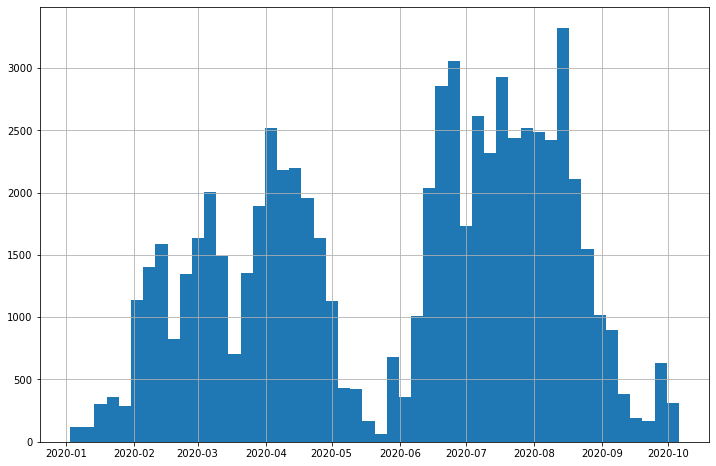

In [15]:
df['date'] = pd.to_datetime(df['date'], yearfirst=True, format='%Y/%m/%d')
df['date'] = df['date'].dt.normalize()
df['date'].sort_index().hist(bins='auto', figsize=(12,8));

In [16]:
df.loc[(df['split'] == 'Summer') & 
       (df['date'] < '2020-06-05')& 
       (df['league'].isin(wc_leagues)), 
       ('league', 'split', 'date')].tail()

,league,split,date
27487,LCK,Summer,2020-04-30
27488,LCK,Summer,2020-04-30
27489,LCK,Summer,2020-04-30
27490,LCK,Summer,2020-04-30
27491,LCK,Summer,2020-04-30


Checking if there are any entries mislabeled as `Summer`. The dip in the histogram above in May reflects the break between the spring and summer splits. Therefore, anything before the beginning of the LPL region's summer split on June 5 should not be classified as `Summer`.

In [17]:
df.loc[(df['split'] == 'Summer') & 
       (df['date'] > '2020-06-05')& 
       (df['league'].isin(wc_leagues)), 
       ('league', 'split', 'date')].head()

,league,split,date
30156,LPL,Summer,2020-06-06
30157,LPL,Summer,2020-06-06
30158,LPL,Summer,2020-06-06
30159,LPL,Summer,2020-06-06
30160,LPL,Summer,2020-06-06


In [18]:
df1 = df.loc[df['date'] >= '2020-06-05'].copy()
df1.head()

,gameid,datacompleteness,url,league,year,split,playoffs,date,game,patch,playerid,side,position,player,team,champion,ban1,ban2,ban3,ban4,ban5,gamelength,result,kills,deaths,assists,teamkills,teamdeaths,doublekills,triplekills,quadrakills,pentakills,firstblood,firstbloodkill,firstbloodassist,firstbloodvictim,team kpm,ckpm,firstdragon,dragons,opp_dragons,elementaldrakes,opp_elementaldrakes,infernals,mountains,clouds,oceans,dragons (type unknown),elders,opp_elders,firstherald,heralds,opp_heralds,firstbaron,barons,opp_barons,firsttower,towers,opp_towers,firstmidtower,firsttothreetowers,inhibitors,opp_inhibitors,damagetochampions,dpm,damageshare,damagetakenperminute,damagemitigatedperminute,wardsplaced,wpm,wardskilled,wcpm,controlwardsbought,visionscore,vspm,totalgold,earnedgold,earned gpm,earnedgoldshare,goldspent,gspd,total cs,minionkills,monsterkills,monsterkillsownjungle,monsterkillsenemyjungle,cspm,goldat10,xpat10,csat10,opp_goldat10,opp_xpat10,opp_csat10,golddiffat10,xpdiffat10,csdiffat10,goldat15,xpat15,csat15,opp_goldat15,opp_xpat15,opp_csat15,golddiffat15,xpdiffat15,csdiffat15
30000,ESPORTSTMNT01/1401186,complete,http://matchhistory.na.leagueoflegends.com/en/...,OPL,2020,Split 2,0,2020-06-05,1,10.11,1,Blue,top,BioPanther,Pentanet.GG,Ornn,Graves,Nidalee,Yuumi,Sylas,Azir,2274,1,5,2,12,28,15,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.7388,1.1346,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,20051,529.0501,0.183885,567.3879,1350.8443,15,0.3958,1,0.0264,2,24.0,0.6332,14752,9837,259.5515,0.212237,13600.0,NaN,265.0,253.0,12,9,0,6.9921,3284.0,4174.0,72.0,3725.0,4619.0,77.0,-441.0,-445.0,-5.0,4733.0,6254.0,108.0,5414.0,7129.0,126.0,-681.0,-875.0,-18.0
30001,ESPORTSTMNT01/1401186,complete,http://matchhistory.na.leagueoflegends.com/en/...,OPL,2020,Split 2,0,2020-06-05,1,10.11,2,Blue,jng,Pabu,Pentanet.GG,Fiddlesticks,Graves,Nidalee,Yuumi,Sylas,Azir,2274,1,2,2,17,28,15,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.7388,1.1346,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,31547,832.3747,0.289313,748.6544,745.6992,8,0.2111,11,0.2902,8,87.0,2.2955,12996,8081,213.2190,0.174352,12000.0,NaN,188.0,36.0,152,108,6,4.9604,3351.0,3941.0,76.0,3470.0,3898.0,77.0,-119.0,43.0,-1.0,5052.0,5733.0,103.0,5208.0,6199.0,120.0,-156.0,-466.0,-17.0
30002,ESPORTSTMNT01/1401186,complete,http://matchhistory.na.leagueoflegends.com/en/...,OPL,2020,Split 2,0,2020-06-05,1,10.11,3,Blue,mid,Getback,Pentanet.GG,Nocturne,Graves,Nidalee,Yuumi,Sylas,Azir,2274,1,7,5,7,28,15,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.7388,1.1346,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0.0,16602,438.0475,0.152255,635.9367,536.3852,18,0.4749,6,0.1583,9,42.0,1.1082,14060,9145,241.2929,0.197308,12300.0,NaN,220.0,211.0,9,5,1,5.8047,3114.0,4158.0,82.0,3345.0,4666.0,94.0,-231.0,-508.0,-12.0,5471.0,6622.0,123.0,5657.0,7648.0,156.0,-186.0,-1026.0,-33.0
30003,ESPORTSTMNT01/1401186,complete,http://matchhistory.na.leagueoflegends.com/en/...,OPL,2020,Split 2,0,2020-06-05,1,10.11,4,Blue,bot,Praedyth,Pentanet.GG,Kalista,Graves,Nidalee,Yuumi,Sylas,Azir,2274,1,10,3,10,28,15,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.7388,1.1346,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0.0,29622,781.5831,0.271659,412.5066,808.2850,16,0.4222,7,0.1847,6,53.0,1.3984,18721,13806,364.2744,0.297866,16550.0,NaN,352.0,273.0,79,40,7,9.2876,3992.0,3003.0,85.0,1984.0,2635.0,5.0,2008.0,368.0,80.0,6303.0,5430.0,132.0,2968.0,3828.0,13.0,3335.0,1602.0,119.0
30004,ESPORTSTMNT01/1401186,complete,http://matchhistory.na.leagueoflegends.com/en/...,OPL,2020,Split 2,0,2020-06-05,1,10.11,5,Blue,sup,Rogue,Pentanet.GG,Thresh,Graves,Nidalee,Yuumi,Sylas,Azir,2274,1,4,3,19,28,15,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.7388,1.1346,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,11219,296.0158,0.102888,401.4248,655.8839,58,1.5303,5,0

In [19]:
df1 = df1.loc[((df['league'].isin(wc_leagues)))].copy()
df1.shape

(13548, 105)

In [20]:
df1['league'].value_counts()

LPL    4380
LCK    2676
PCS    1680
LCS    1668
LEC    1440
WCS     996
LCL     708
Name: league, dtype: int64

In [21]:
df1.isna().sum().sort_values(ascending=False).head(30)

dragons (type unknown)    13518
firstbaron                11348
mountains                 11320
opp_elders                11320
elders                    11320
oceans                    11320
clouds                    11320
elementaldrakes           11320
opp_elementaldrakes       11320
infernals                 11320
firstmidtower             11296
firsttothreetowers        11294
firsttower                11294
heralds                   11294
firstherald               11294
opp_heralds               11294
firstdragon               11294
opp_dragons               11290
dragons                   11290
opp_towers                11290
towers                    11290
opp_barons                11290
barons                    11290
gspd                      11290
inhibitors                 3774
opp_inhibitors             3774
firstbloodassist           2278
firstbloodvictim           2278
firstbloodkill             2278
earnedgoldshare            2258
dtype: int64

This dataset contains many missing values that cannot be imputed due to the nature of the missing value. Therefore, many of these columns will be dropped as they cannot be used reliably to draw predictions. For now, any column that is missing more than 10,000 entries (almost 80% of summer split data) will be removed from the dataset.

## Possible Area of Improvement

In future work, rather than removing these columns, additional analysis can be done on the missing values to determine possible placeholder values or methods to calculate/infer the data. For the scope and scale of this project, these values will instead be dropped.

In [22]:
todrop = df1.loc[:, (df1.isna().sum() > 10000)].columns
df1.drop(todrop, axis=1, inplace=True)
df1.shape

(13548, 81)

In [23]:
df1.isna().sum().sort_values(ascending=False).head(15)

opp_inhibitors      3774
inhibitors          3774
firstbloodvictim    2278
firstbloodassist    2278
firstbloodkill      2278
earnedgoldshare     2258
total cs            2258
champion            2258
player              2258
damageshare         2258
split                996
minionkills          754
cspm                 754
ban3                  42
csdiffat15            36
dtype: int64

## Inhibitors

In [24]:
df1.loc[df1['opp_inhibitors'].isnull()].head(20)

,gameid,datacompleteness,url,league,year,split,playoffs,date,game,patch,playerid,side,position,player,team,champion,ban1,ban2,ban3,ban4,ban5,gamelength,result,kills,deaths,assists,teamkills,teamdeaths,doublekills,triplekills,quadrakills,pentakills,firstblood,firstbloodkill,firstbloodassist,firstbloodvictim,team kpm,ckpm,inhibitors,opp_inhibitors,damagetochampions,dpm,damageshare,damagetakenperminute,damagemitigatedperminute,wardsplaced,wpm,wardskilled,wcpm,controlwardsbought,visionscore,vspm,totalgold,earnedgold,earned gpm,earnedgoldshare,goldspent,total cs,minionkills,monsterkills,monsterkillsownjungle,monsterkillsenemyjungle,cspm,goldat10,xpat10,csat10,opp_goldat10,opp_xpat10,opp_csat10,golddiffat10,xpdiffat10,csdiffat10,goldat15,xpat15,csat15,opp_goldat15,opp_xpat15,opp_csat15,golddiffat15,xpdiffat15,csdiffat15
30048,6200-7807,complete,https://lpl.qq.com/es/stats.shtml?bmid=6200,LPL,2020,Summer,0,2020-06-05,1,10.11,1,Blue,top,Aodi,EDward Gaming,Aatrox,Karma,Ornn,Galio,Thresh,Pantheon,2092,1,1,1,10,21,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.6023,0.7457,NaN,NaN,18230,522.8489,0.235007,736.7495,1005.3155,17,0.4876,5,0.1434,9,37.0,1.0612,13130,8587,246.2811,0.184881,11650.0,268.0,252.0,16,3,4,7.6864,2960.0,4351.0,71.0,3549.0,4382.0,85.0,-589.0,-31.0,-14.0,4733.0,7268.0,124.0,5830.0,7379.0,144.0,-1097.0,-111.0,-20.0
30049,6200-7807,complete,https://lpl.qq.com/es/stats.shtml?bmid=6200,LPL,2020,Summer,0,2020-06-05,1,10.11,2,Blue,jng,JunJia,EDward Gaming,Nidalee,Karma,Ornn,Galio,Thresh,Pantheon,2092,1,5,0,11,21,5,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.6023,0.7457,NaN,NaN,14428,413.8050,0.185995,788.9771,531.5679,48,1.3767,25,0.7170,11,112.0,3.2122,13315,8772,251.5870,0.188864,10925.0,232.0,31.0,201,116,35,6.6539,3425.0,4338.0,80.0,3312.0,3349.0,55.0,113.0,989.0,25.0,4942.0,6254.0,114.0,5302.0,5616.0,90.0,-360.0,638.0,24.0
30050,6200-7807,complete,https://lpl.qq.com/es/stats.shtml?bmid=6200,LPL,2020,Summer,0,2020-06-05,1,10.11,3,Blue,mid,Scout,EDward Gaming,Syndra,Karma,Ornn,Galio,Thresh,Pantheon,2092,1,2,2,11,21,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.6023,0.7457,NaN,NaN,17642,505.9847,0.227427,287.6386,172.1989,9,0.2581,7,0.2008,6,41.0,1.1759,14137,9594,275.1625,0.206563,12500.0,307.0,276.0,31,21,5,8.8050,3566.0,4986.0,102.0,3203.0,4767.0,88.0,363.0,219.0,14.0,6132.0,8112.0,170.0,4943.0,6598.0,127.0,1189.0,1514.0,43.0
30051,6200-7807,complete,https://lpl.qq.com/es/stats.shtml?bmid=6200,LPL,2020,Summer,0,2020-06-05,1,10.11,4,Blue,bot,Hope,EDward Gaming,Kalista,Karma,Ornn,Galio,Thresh,Pantheon,2092,1,10,1,6,21,5,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.6023,0.7457,NaN,NaN,16497,473.1453,0.212667,389.1109,465.2581,9,0.2581,16,0.4589,1,46.0,1.3193,18466,13923,399.3212,0.299770,16825.0,336.0,298.0,38,28,6,9.6367,4560.0,3105.0,86.0,2738.0,2542.0,60.0,1822.0,563.0,26.0,7594.0,5654.0,155.0,4631.0,4484.0,116.0,2963.0,1170.0,39.0
30052,6200-7807,complete,https://lpl.qq.com/es/stats.shtml?bmid=6200,LPL,2020,Summer,0,2020-06-05,1,10.11,5,Blue,sup,Meiko,EDward Gaming,Sett,Karma,Ornn,Galio,Thresh,Pantheon,2092,1,3,1,12,21,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.6023,0.7457,NaN,NaN,10775,309.0344,0.138903,605.9369,775.8413,65,1.8642,17,0.4876,21,112.0,3.2122,10113,5570,159.7514,0.119922,8925.0,39.0,39.0,0,0,0,1.1185,2904.0,2563.0,13.0,2247.0,2377.0,21.0,657.0,186.0,-8.0,4201.0,4037.0,21.0,3414.0,3794.0,31.0,787.0,243.0,-10.0
30053,6200-7807,complete,https://lpl.qq.com/es/stats.shtml?bmid=6200,LPL,2020,Summer,0,2020-06-05,1,10.11,6,Red,top,Morgan,Team WE,Renekton,Varus,Graves,Trundle,Azir,Irelia,2092,0,1,5,4,5,21,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.1434,0.7457,NaN,NaN,12729,365.0765,0.208706,859.9331,605.8795,9,0.2581,16,0.4589,5,39.0,1.1185,13257,8714,249.9235,0.264842,13250.0,306.0,302.0,4,4,0,8.7763,3549.0,4382.0,85.0,2960.0,4351.0,71.0,589.0,31.0,14.0,5830.0,7379.0,144.0,4733.0,7268.0,124.0,1097.0,111.0,20.0
30054,6200-7807,complete,https://lpl.qq.com/es/stats.shtml?bmid=6200,LPL,2020,Summer,0,2020-06-05,1,10.11,7,Red,jng,beishang,Team WE,Elise,Varus,Graves,Trundle,Az

`Inhibitors` and `opp_inhibitors` are missing from the individual player data as the game keeps track of inhibitor kills by team, not by each player. This could potentially be the reason that there are so many other columns with a large number of missing values. Before filling in the values for the inhibitors, I will continue to investigate the other columns containing null values.

## Firstblood

In [25]:
fb = df1.isna().sum().sort_values(ascending=False)[2:5].index

In [26]:
df1.loc[:, fb].head(20)

,firstbloodvictim,firstbloodassist,firstbloodkill
30048,1.0,0.0,0.0
30049,0.0,0.0,0.0
30050,0.0,0.0,0.0
30051,0.0,0.0,0.0
30052,0.0,0.0,0.0
30053,0.0,1.0,0.0
30054,0.0,0.0,1.0
30055,0.0,0.0,0.0
30056,0.0,0.0,0.0
30057,0.0,0.0,0.0


The missing values in the first blood columns are only in the team stats rows. These values can be filled easily by seeing which team the player is on that received the kill credit. Since these are binary features, a `1.0` can be inputed for the team that received the credit and a `0.0` for the opposing team.

Eventually, all of the individual player stats will not be used in the final model to predict the winner. Each team's averaged stats will be used instead. Therefore, it is not necessary to know which _player_ received the credit, but rather which _team_ received the credit. 

## Other Missing Values

In [27]:
missing = df1.isnull().sum().sort_values(ascending=False)[5:10].index
df1.loc[:, missing].head(15)

,earnedgoldshare,total cs,champion,player,damageshare
30048,0.184881,268.0,Aatrox,Aodi,0.235007
30049,0.188864,232.0,Nidalee,JunJia,0.185995
30050,0.206563,307.0,Syndra,Scout,0.227427
30051,0.299770,336.0,Kalista,Hope,0.212667
30052,0.119922,39.0,Sett,Meiko,0.138903
30053,0.264842,306.0,Renekton,Morgan,0.208706
30054,0.181290,168.0,Elise,beishang,0.127775
30055,0.214328,266.0,Aurelion Sol,Teacherma,0.138023
30056,0.266969,330.0,Aphelios,Jiumeng,0.443646
30057,0.072571,45.0,Nautilus,Missing,0.081850


These columns, similar to the firstblood stats, are missing for the rows representing the team stats. This can be expected from columns like `earnedgoldshare` and `damageshare`, as their values have been calculated as a percentage of the overall team value. These columns will be dropped, along with any other `-share` columns that we may find later one, since combining these values for the team average will only result in `1.0`, or 100%.

The `champion` and `player` columns will be dropped since they are individual player stats that cannot be averaged for the team (at least for this project).

In [28]:
df1.drop(['champion', 'player'], axis=1, inplace=True)

In [29]:
df1.drop(['earnedgoldshare', 'damageshare'], axis=1, inplace=True)

In [30]:
df1.loc[:, ('total cs', 'minionkills', 'monsterkills')].head(12)

,total cs,minionkills,monsterkills
30048,268.0,252.0,16
30049,232.0,31.0,201
30050,307.0,276.0,31
30051,336.0,298.0,38
30052,39.0,39.0,0
30053,306.0,302.0,4
30054,168.0,22.0,146
30055,266.0,239.0,27
30056,330.0,299.0,31
30057,45.0,45.0,0


The `total cs` column shows the amount of minions + monsters each player killed in the game. In order to inpute the team value, the player values will be totaled for each team. This will also allow us to remove `minionkills` from the dataset since it can be calculated using `total cs` and `monsterkills`.

In [31]:
df1.drop('minionkills', axis=1, inplace=True)

In [32]:
df1.loc[:, ('gamelength', 'total cs', 'cspm')].head(12)

,gamelength,total cs,cspm
30048,2092,268.0,7.6864
30049,2092,232.0,6.6539
30050,2092,307.0,8.8050
30051,2092,336.0,9.6367
30052,2092,39.0,1.1185
30053,2092,306.0,8.7763
30054,2092,168.0,4.8184
30055,2092,266.0,7.6291
30056,2092,330.0,9.4646
30057,2092,45.0,1.2906


In [33]:
268/(2092/60) # total cs / (gamelength in seconds/ 60 seconds)

7.686424474187381

`cspm` is calculated using the `total cs` and `gamelength` columns. Creep score per minute, `cspm`, can be calculated per team once the team totals for `total cs` are calculated.

In [34]:
df1['split'].value_counts() # some spring split games found their way into the data

Summer    12456
Spring       96
Name: split, dtype: int64

In [35]:
len(df1), df1['split'].isnull().sum()

(13548, 996)

In [36]:
996/13548

0.07351638618246235

`split` is still missing 996 values (7% of the remaining data). Before finding the missing `split` values, the 96 entries that belong in the `Spring` split should be taken care of.

In [37]:
df1.loc[df1['split'] == 'Spring', 'team'].value_counts() # none of these teams are in wc_teams

Impunity         30
Resurgence       30
Liyab Esports    18
unknown team     18
Name: team, dtype: int64

In [38]:
df1.loc[df1['split'] == 'Spring', ('date')].value_counts()

2020-09-08    60
2020-09-09    36
Name: date, dtype: int64

A quick search shows that the `PCS` region was holding their promotional tournament during the beginning stages of World's in September. This promo tournament was to determine who would play in the 2021 Spring split in the PCS region. These values will all be dropped as they were being held at the same time during the World Championships but was a completely separate event.

In [39]:
spring_ind = df1.loc[df1['split'] == 'Spring', ('date')].index
spring_ind

Int64Index([67500, 67501, 67502, 67503, 67504, 67505, 67506, 67507, 67508,
            67509, 67510, 67511, 67524, 67525, 67526, 67527, 67528, 67529,
            67530, 67531, 67532, 67533, 67534, 67535, 67548, 67549, 67550,
            67551, 67552, 67553, 67554, 67555, 67556, 67557, 67558, 67559,
            67560, 67561, 67562, 67563, 67564, 67565, 67566, 67567, 67568,
            67569, 67570, 67571, 67572, 67573, 67574, 67575, 67576, 67577,
            67578, 67579, 67580, 67581, 67582, 67583, 67656, 67657, 67658,
            67659, 67660, 67661, 67662, 67663, 67664, 67665, 67666, 67667,
            67668, 67669, 67670, 67671, 67672, 67673, 67674, 67675, 67676,
            67677, 67678, 67679, 67692, 67693, 67694, 67695, 67696, 67697,
            67698, 67699, 67700, 67701, 67702, 67703],
           dtype='int64')

In [40]:
df1.drop(index=spring_ind, axis=0, inplace=True)
df1['split'].value_counts()

Summer    12456
Name: split, dtype: int64

In [41]:
df1.loc[df1['split'].isnull()]

,gameid,datacompleteness,url,league,year,split,playoffs,date,game,patch,playerid,side,position,team,ban1,ban2,ban3,ban4,ban5,gamelength,result,kills,deaths,assists,teamkills,teamdeaths,doublekills,triplekills,quadrakills,pentakills,firstblood,firstbloodkill,firstbloodassist,firstbloodvictim,team kpm,ckpm,inhibitors,opp_inhibitors,damagetochampions,dpm,damagetakenperminute,damagemitigatedperminute,wardsplaced,wpm,wardskilled,wcpm,controlwardsbought,visionscore,vspm,totalgold,earnedgold,earned gpm,goldspent,total cs,monsterkills,monsterkillsownjungle,monsterkillsenemyjungle,cspm,goldat10,xpat10,csat10,opp_goldat10,opp_xpat10,opp_csat10,golddiffat10,xpdiffat10,csdiffat10,goldat15,xpat15,csat15,opp_goldat15,opp_xpat15,opp_csat15,golddiffat15,xpdiffat15,csdiffat15
65400,6700-8959,complete,https://lpl.qq.com/es/stats.shtml?bmid=6700,WCS,2020,NaN,0,2020-08-28,1,10.16,1,Blue,top,Suning,Nidalee,Twisted Fate,Ornn,Bard,Thresh,2170,1,1,2,4,12,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.3318,0.4700,NaN,NaN,11849,327.6221,798.8295,710.5161,20,0.5530,5,0.1382,12,34.0,0.9401,13460,8758,242.1567,12025.0,294.0,24,14,0,8.1290,3156.0,4491.0,83.0,3595.0,4534.0,86.0,-439.0,-43.0,-3.0,5241.0,7781.0,146.0,5291.0,7249.0,132.0,-50.0,532.0,14.0
65401,6700-8959,complete,https://lpl.qq.com/es/stats.shtml?bmid=6700,WCS,2020,NaN,0,2020-08-28,1,10.16,2,Blue,jng,Suning,Nidalee,Twisted Fate,Ornn,Bard,Thresh,2170,1,2,0,10,12,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.3318,0.4700,NaN,NaN,12108,334.7834,1182.9124,1431.1244,30,0.8295,13,0.3594,19,51.0,1.4101,12345,7643,211.3272,11250.0,196.0,173,104,21,5.4194,3269.0,3795.0,72.0,3059.0,3493.0,62.0,210.0,302.0,10.0,4897.0,5980.0,111.0,4720.0,5441.0,101.0,177.0,539.0,10.0
65402,6700-8959,complete,https://lpl.qq.com/es/stats.shtml?bmid=6700,WCS,2020,NaN,0,2020-08-28,1,10.16,3,Blue,mid,Suning,Nidalee,Twisted Fate,Ornn,Bard,Thresh,2170,1,5,1,3,12,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.3318,0.4700,NaN,NaN,25947,717.4286,258.1106,153.1797,15,0.4147,6,0.1659,8,36.0,0.9954,15611,10909,301.6313,13472.0,345.0,27,20,3,9.5392,3444.0,4617.0,93.0,3266.0,4918.0,83.0,178.0,-301.0,10.0,5271.0,7318.0,151.0,5659.0,8180.0,142.0,-388.0,-862.0,9.0
65403,6700-8959,complete,https://lpl.qq.com/es/stats.shtml?bmid=6700,WCS,2020,NaN,0,2020-08-28,1,10.16,4,Blue,bot,Suning,Nidalee,Twisted Fate,Ornn,Bard,Thresh,2170,1,4,1,6,12,5,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.3318,0.4700,NaN,NaN,32458,897.4562,474.0829,590.9309,17,0.4700,9,0.2488,5,30.0,0.8295,16462,11760,325.1613,15625.0,347.0,36,31,0,9.5945,3702.0,4115.0,98.0,3124.0,3412.0,78.0,578.0,703.0,20.0,5359.0,6131.0,144.0,5510.0,5925.0,140.0,-151.0,206.0,4.0
65404,6700-8959,complete,https://lpl.qq.com/es/stats.shtml?bmid=6700,WCS,2020,NaN,0,2020-08-28,1,10.16,5,Blue,sup,Suning,Nidalee,Twisted Fate,Ornn,Bard,Thresh,2170,1,0,1,6,12,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.3318,0.4700,NaN,NaN,2531,69.9816,341.0599,513.5115,62,1.7143,15,0.4147,17,118.0,3.2627,7964,3262,90.1935,7350.0,45.0,0,0,0,1.2442,2063.0,2027.0,13.0,2115.0,2033.0,12.0,-52.0,-6.0,1.0,3146.0,3382.0,24.0,3517.0,3954.0,19.0,-371.0,-572.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69319,ESPORTSTMNT03/1551831,complete,http://matchhistory.na.leagueoflegends.com/en/...,WCS,2020,NaN,0,2020-10-06,1,10.19,8,Red,mid,Gen.G,Lucian,Thresh,Evelynn,Nautilus,Syndra,1670,0,2,1,3,9,17,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.3234,0.9341,0.0,0.0,8866,318.5389,286.2754,169.4731,14,0.5030,1,0.0359,5,20.0,0.7186,11108,7426,266.8024,10400.0,252.0,20,17,0,9.0539,3148.0,4302.0,73.0,3555.0,4643.0,85.0,-407.0,-341.0,-12.0,6493.0,8104.0,137.0,5653.0,7837.0,143.0,840.0,267.0,-6.0
69320,ESPORTSTMNT03/1551831,complete,http://matchhistory.na.leagueoflegends.com/en/...,WCS,2020,NaN,0,2020-10-06,1,10.19,9,Red,bot,Gen.G,Lucian,Thresh

The remaining nulls in `split` are coming from the actual World Championship games. These `split` values will be filled with `"Worlds"`.

In [42]:
df1['split'].fillna(value='Worlds', inplace=True)
df1['split'].isnull().sum()

0

In [43]:
df1.isnull().sum().sort_values(ascending=False)[10:20]
# few more columns left with null values. they all have the same number of nulls, possibly all from same game(s)

goldat10        36
xpat10          36
csat10          36
csdiffat15      36
opp_xpat10      36
xpat15          36
golddiffat10    36
xpdiffat10      36
csdiffat10      36
golddiffat15    36
dtype: int64

In [44]:
few_miss = df1.loc[:, (df1.isnull().sum() > 0) & (df1.isnull().sum() < 50)].columns
df1.loc[df1[few_miss].isnull().any(axis=1), few_miss].head(12)

,gameid,ban1,ban2,ban3,ban4,ban5,goldat10,xpat10,csat10,opp_goldat10,opp_xpat10,opp_csat10,golddiffat10,xpdiffat10,csdiffat10,goldat15,xpat15,csat15,opp_goldat15,opp_xpat15,opp_csat15,golddiffat15,xpdiffat15,csdiffat15
30372,6205-7819,LeBlanc,Trundle,Yuumi,NaN,Hecarim,3130.0,4734.0,80.0,3255.0,4662.0,78.0,-125.0,72.0,2.0,6020.0,7925.0,134.0,4857.0,7086.0,121.0,1163.0,839.0,13.0
30373,6205-7819,LeBlanc,Trundle,Yuumi,NaN,Hecarim,3256.0,3598.0,72.0,3345.0,3726.0,74.0,-89.0,-128.0,-2.0,5079.0,5082.0,90.0,4734.0,5544.0,105.0,345.0,-462.0,-15.0
30374,6205-7819,LeBlanc,Trundle,Yuumi,NaN,Hecarim,3469.0,4849.0,94.0,3335.0,4800.0,89.0,134.0,49.0,5.0,5754.0,7448.0,141.0,5199.0,7693.0,151.0,555.0,-245.0,-10.0
30375,6205-7819,LeBlanc,Trundle,Yuumi,NaN,Hecarim,3540.0,3675.0,92.0,3188.0,3217.0,80.0,352.0,458.0,12.0,6985.0,6633.0,156.0,4932.0,5486.0,131.0,2053.0,1147.0,25.0
30376,6205-7819,LeBlanc,Trundle,Yuumi,NaN,Hecarim,2530.0,2024.0,15.0,2110.0,2400.0,13.0,420.0,-376.0,2.0,3708.0,3058.0,21.0,3139.0,3085.0,23.0,569.0,-27.0,-2.0
30382,6205-7819,LeBlanc,Trundle,Yuumi,NaN,Hecarim,15925.0,18880.0,353.0,15233.0,18805.0,334.0,692.0,75.0,19.0,27546.0,30146.0,542.0,22861.0,28894.0,531.0,4685.0,1252.0,11.0
38213,ESPORTSTMNT05/1520597,Kalista,Varus,Aphelios,Trundle,NaN,2985.0,4663.0,74.0,3477.0,4550.0,77.0,-492.0,113.0,-3.0,5292.0,8017.0,122.0,5568.0,7085.0,127.0,-276.0,932.0,-5.0
38214,ESPORTSTMNT05/1520597,Kalista,Varus,Aphelios,Trundle,NaN,3074.0,3531.0,65.0,3277.0,3639.0,66.0,-203.0,-108.0,-1.0,4815.0,5923.0,106.0,5256.0,5880.0,102.0,-441.0,43.0,4.0
38215,ESPORTSTMNT05/1520597,Kalista,Varus,Aphelios,Trundle,NaN,3122.0,4188.0,82.0,3408.0,4521.0,94.0,-286.0,-333.0,-12.0,4778.0,6575.0,115.0,6010.0,7950.0,142.0,-1232.0,-1375.0,-27.0
38216,ESPORTSTMNT05/1520597,Kalista,Varus,Aphelios,Trundle,NaN,3139.0,3226.0,80.0,3271.0,3581.0,84.0,-132.0,-355.0,-4.0,4614.0,5426.0,125.0,5834.0,5574.0,136.0,-1220.0,-148.0,-11.0


In [45]:
for x in range(1, 6):
    print(f'Ban{x}:', len(df1[f'ban{x}'].unique()))

Ban1: 71
Ban2: 77
Ban3: 81
Ban4: 106
Ban5: 115


# Bans

The `ban` columns contain all of the banned champions in each game. The most number of unique champions banned in a column is 115. That would mean 115 OHE columns after processing categorical values. Bans are typically dependent on the "flavor of the month" champion pick, or the champions that work best with the current patch. This can change drastically from patch to patch. It will also vary greatly on the teams that are playing. Some players might be very adept at certain characters that opponents have no strategy against. Teams will then ban out the favorites of some of their opponents. This will also change the bans for every single match.

Therefore, I will be dropping these columns in the interest of time and computational power. 

In [46]:
drop_cols = ['ban1', 'ban2', 'ban3', 'ban4', 'ban5']
df1.drop(drop_cols, axis=1, inplace=True)

In [47]:
few_miss = few_miss.drop(drop_cols)
df1.loc[df1[few_miss].isnull().any(axis=1), few_miss].head(12)

,gameid,goldat10,xpat10,csat10,opp_goldat10,opp_xpat10,opp_csat10,golddiffat10,xpdiffat10,csdiffat10,goldat15,xpat15,csat15,opp_goldat15,opp_xpat15,opp_csat15,golddiffat15,xpdiffat15,csdiffat15
64884,6687-8941,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
64885,6687-8941,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
64886,6687-8941,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
64887,6687-8941,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
64888,6687-8941,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
64889,6687-8941,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
64890,6687-8941,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
64891,6687-8941,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
64892,6687-8941,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
64893,6687-8941,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [48]:
df1.loc[df1[few_miss].isnull().any(axis=1), few_miss]

,gameid,goldat10,xpat10,csat10,opp_goldat10,opp_xpat10,opp_csat10,golddiffat10,xpdiffat10,csdiffat10,goldat15,xpat15,csat15,opp_goldat15,opp_xpat15,opp_csat15,golddiffat15,xpdiffat15,csdiffat15
64884,6687-8941,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
64885,6687-8941,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
64886,6687-8941,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
64887,6687-8941,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
64888,6687-8941,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
64889,6687-8941,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
64890,6687-8941,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
64891,6687-8941,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
64892,6687-8941,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
64893,6687-8941,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


The remaining missing values are coming from 4 matches that have incomplete data, including 3 that are missing everything besides the `gameid`, which will eventually be dropped as it is only used for categorizing purposes. The 3 games will be dropped as there are more than 1000+ total matches in the current dataframe. The final model will not be heavily impacted by dropping these matches.

In [49]:
df1.loc[df1['gameid'].isnull()]

,gameid,datacompleteness,url,league,year,split,playoffs,date,game,patch,playerid,side,position,team,gamelength,result,kills,deaths,assists,teamkills,teamdeaths,doublekills,triplekills,quadrakills,pentakills,firstblood,firstbloodkill,firstbloodassist,firstbloodvictim,team kpm,ckpm,inhibitors,opp_inhibitors,damagetochampions,dpm,damagetakenperminute,damagemitigatedperminute,wardsplaced,wpm,wardskilled,wcpm,controlwardsbought,visionscore,vspm,totalgold,earnedgold,earned gpm,goldspent,total cs,monsterkills,monsterkillsownjungle,monsterkillsenemyjungle,cspm,goldat10,xpat10,csat10,opp_goldat10,opp_xpat10,opp_csat10,golddiffat10,xpdiffat10,csdiffat10,goldat15,xpat15,csat15,opp_goldat15,opp_xpat15,opp_csat15,golddiffat15,xpdiffat15,csdiffat15
65196,NaN,complete,https://lpl.qq.com/es/stats.shtml?bmid=6686,LPL,2020,Summer,1,2020-08-27,2,10.16,1,Blue,top,JD Gaming,2277,1,8,4,4,20,16,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.5270,0.9486,NaN,NaN,24002,632.4638,887.9051,1183.6891,16,0.4216,5,0.1318,3,28.0,0.7378,17870,12949,341.2121,17658.0,345.0,19,10,0,9.0909,3326.0,4645.0,78.0,3313.0,4673.0,86.0,13.0,-28.0,-8.0,5255.0,7633.0,136.0,5457.0,7855.0,149.0,-202.0,-222.0,-13.0
65197,NaN,complete,https://lpl.qq.com/es/stats.shtml?bmid=6686,LPL,2020,Summer,1,2020-08-27,2,10.16,2,Blue,jng,JD Gaming,2277,1,4,4,13,20,16,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.5270,0.9486,NaN,NaN,14075,370.8827,992.4901,653.6495,7,0.1845,19,0.5007,6,54.0,1.4229,16152,11231,295.9420,14250.0,304.0,228,147,24,8.0105,4281.0,4374.0,82.0,3135.0,3708.0,70.0,1146.0,666.0,12.0,5810.0,6384.0,123.0,6021.0,6524.0,106.0,-211.0,-140.0,17.0
65198,NaN,complete,https://lpl.qq.com/es/stats.shtml?bmid=6686,LPL,2020,Summer,1,2020-08-27,2,10.16,3,Blue,mid,JD Gaming,2277,1,5,3,8,20,16,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.5270,0.9486,NaN,NaN,17399,458.4717,531.0145,296.2582,9,0.2372,12,0.3162,7,40.0,1.0540,16202,11281,297.2596,15550.0,297.0,11,5,0,7.8261,3186.0,4737.0,88.0,3411.0,4972.0,97.0,-225.0,-235.0,-9.0,5047.0,7485.0,139.0,5898.0,7931.0,150.0,-851.0,-446.0,-11.0
65199,NaN,complete,https://lpl.qq.com/es/stats.shtml?bmid=6686,LPL,2020,Summer,1,2020-08-27,2,10.16,4,Blue,bot,JD Gaming,2277,1,3,3,10,20,16,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.5270,0.9486,NaN,NaN,18039,475.3360,391.3307,200.7115,14,0.3689,7,0.1845,8,41.0,1.0804,15822,10901,287.2464,15150.0,341.0,40,30,6,8.9855,3652.0,3174.0,90.0,3232.0,3267.0,90.0,420.0,-93.0,0.0,5223.0,5383.0,136.0,6252.0,5774.0,140.0,-1029.0,-391.0,-4.0
65200,NaN,complete,https://lpl.qq.com/es/stats.shtml?bmid=6686,LPL,2020,Summer,1,2020-08-27,2,10.16,5,Blue,sup,JD Gaming,2277,1,0,2,12,20,16,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.5270,0.9486,NaN,NaN,5583,147.1146,607.1410,961.8972,76,2.0026,11,0.2899,23,107.0,2.8195,8728,3807,100.3162,7875.0,34.0,0,0,0,0.8959,2185.0,2597.0,13.0,1960.0,2133.0,12.0,225.0,464.0,1.0,3083.0,3389.0,19.0,3512.0,3639.0,19.0,-429.0,-250.0,0.0
65201,NaN,complete,https://lpl.qq.com/es/stats.shtml?bmid=6686,LPL,2020,Summer,1,2020-08-27,2,10.16,6,Red,top,Top Esports,2277,0,4,3,3,16,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.4216,0.9486,NaN,NaN,17378,457.9183,778.5507,924.4005,10,0.2635,13,0.3426,4,44.0,1.1594,16707,11786,310.5665,16533.0,365.0,19,4,9,9.6179,3313.0,4673.0,86.0,3326.0,4645.0,78.0,-13.0,28.0,8.0,5457.0,7855.0,149.0,5255.0,7633.0,136.0,202.0,222.0,13.0
65202,NaN,complete,https://lpl.qq.com/es/stats.shtml?bmid=6686,LPL,2020,Summer,1,2020-08-27,2,10.16,7,Red,jng,Top Esports,2277,0,3,6,7,16,20,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.4216,0.9486,NaN,NaN,14914,392.9908,613.8603,401.0013,9,0.2372,24,0.6324,8,73.0,1.9236,13668,8747,230.4875,13875.0,245.0,182,119,13,6.4559,3135.0,3708.0,70.0,4281.0,4374.0,82.0,-1146.0,-666.0,-12.0,6021.0,6524.0,106.0,5810.0,6384.0,123.0,211.0,140.0,-17.0
65203,NaN,complete,https://lpl.qq.com/es/stats.shtml?bmid=6686,LPL,2020,Summer,1,2020-08-27,2,10.16,8,Red,mid,Top Esports,2277,0,5,3,10,16,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.4216,0.9486,NaN,NaN,32087,845.5072,535.6258,423.7681,10,0.2635,9,0.2372,6,34.0,0.8959,14663,9742,256.7062,

In [50]:
df1['gameid'].fillna(value='placeholder', inplace=True)
df1['gameid'].isnull().any()

False

In [51]:
drop_cols1 = df1.loc[df1[few_miss].isnull().any(axis=1), few_miss].index
df1.drop(drop_cols1, inplace=True)

In [52]:
def check(n=20): 
    '''
    
    Input - n: number of rows to show
    
    Output - Pandas series showing columns with null values in df1
    
    '''    
    return df1.isnull().sum().sort_values(ascending=False).head(n)

In [53]:
check()

opp_inhibitors      3750
inhibitors          3750
total cs            2236
firstbloodvictim    2236
firstbloodassist    2236
firstbloodkill      2236
cspm                 750
playoffs               0
split                  0
datacompleteness       0
ckpm                   0
team kpm               0
url                    0
league                 0
year                   0
firstblood             0
pentakills             0
quadrakills            0
triplekills            0
doublekills            0
dtype: int64

## Cleaning Up Columns

There are a few columns that can be dropped at this time, just before filling in the rest of the null values.

In [54]:
df1.head()

,gameid,datacompleteness,url,league,year,split,playoffs,date,game,patch,playerid,side,position,team,gamelength,result,kills,deaths,assists,teamkills,teamdeaths,doublekills,triplekills,quadrakills,pentakills,firstblood,firstbloodkill,firstbloodassist,firstbloodvictim,team kpm,ckpm,inhibitors,opp_inhibitors,damagetochampions,dpm,damagetakenperminute,damagemitigatedperminute,wardsplaced,wpm,wardskilled,wcpm,controlwardsbought,visionscore,vspm,totalgold,earnedgold,earned gpm,goldspent,total cs,monsterkills,monsterkillsownjungle,monsterkillsenemyjungle,cspm,goldat10,xpat10,csat10,opp_goldat10,opp_xpat10,opp_csat10,golddiffat10,xpdiffat10,csdiffat10,goldat15,xpat15,csat15,opp_goldat15,opp_xpat15,opp_csat15,golddiffat15,xpdiffat15,csdiffat15
30048,6200-7807,complete,https://lpl.qq.com/es/stats.shtml?bmid=6200,LPL,2020,Summer,0,2020-06-05,1,10.11,1,Blue,top,EDward Gaming,2092,1,1,1,10,21,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.6023,0.7457,NaN,NaN,18230,522.8489,736.7495,1005.3155,17,0.4876,5,0.1434,9,37.0,1.0612,13130,8587,246.2811,11650.0,268.0,16,3,4,7.6864,2960.0,4351.0,71.0,3549.0,4382.0,85.0,-589.0,-31.0,-14.0,4733.0,7268.0,124.0,5830.0,7379.0,144.0,-1097.0,-111.0,-20.0
30049,6200-7807,complete,https://lpl.qq.com/es/stats.shtml?bmid=6200,LPL,2020,Summer,0,2020-06-05,1,10.11,2,Blue,jng,EDward Gaming,2092,1,5,0,11,21,5,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.6023,0.7457,NaN,NaN,14428,413.8050,788.9771,531.5679,48,1.3767,25,0.7170,11,112.0,3.2122,13315,8772,251.5870,10925.0,232.0,201,116,35,6.6539,3425.0,4338.0,80.0,3312.0,3349.0,55.0,113.0,989.0,25.0,4942.0,6254.0,114.0,5302.0,5616.0,90.0,-360.0,638.0,24.0
30050,6200-7807,complete,https://lpl.qq.com/es/stats.shtml?bmid=6200,LPL,2020,Summer,0,2020-06-05,1,10.11,3,Blue,mid,EDward Gaming,2092,1,2,2,11,21,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.6023,0.7457,NaN,NaN,17642,505.9847,287.6386,172.1989,9,0.2581,7,0.2008,6,41.0,1.1759,14137,9594,275.1625,12500.0,307.0,31,21,5,8.8050,3566.0,4986.0,102.0,3203.0,4767.0,88.0,363.0,219.0,14.0,6132.0,8112.0,170.0,4943.0,6598.0,127.0,1189.0,1514.0,43.0
30051,6200-7807,complete,https://lpl.qq.com/es/stats.shtml?bmid=6200,LPL,2020,Summer,0,2020-06-05,1,10.11,4,Blue,bot,EDward Gaming,2092,1,10,1,6,21,5,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.6023,0.7457,NaN,NaN,16497,473.1453,389.1109,465.2581,9,0.2581,16,0.4589,1,46.0,1.3193,18466,13923,399.3212,16825.0,336.0,38,28,6,9.6367,4560.0,3105.0,86.0,2738.0,2542.0,60.0,1822.0,563.0,26.0,7594.0,5654.0,155.0,4631.0,4484.0,116.0,2963.0,1170.0,39.0
30052,6200-7807,complete,https://lpl.qq.com/es/stats.shtml?bmid=6200,LPL,2020,Summer,0,2020-06-05,1,10.11,5,Blue,sup,EDward Gaming,2092,1,3,1,12,21,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.6023,0.7457,NaN,NaN,10775,309.0344,605.9369,775.8413,65,1.8642,17,0.4876,21,112.0,3.2122,10113,5570,159.7514,8925.0,39.0,0,0,0,1.1185,2904.0,2563.0,13.0,2247.0,2377.0,21.0,657.0,186.0,-8.0,4201.0,4037.0,21.0,3414.0,3794.0,31.0,787.0,243.0,-10.0


In [55]:
df1['datacompleteness'].value_counts()

complete    13272
partial       144
Name: datacompleteness, dtype: int64

In [56]:
df1.loc[((df1['datacompleteness'] == 'partial') & (df1.isnull().any(axis=1))), df1.isnull().any()]

,firstbloodkill,firstbloodassist,firstbloodvictim,inhibitors,opp_inhibitors,total cs,cspm
31476,0.0,0.0,0.0,NaN,NaN,352.0,7.0003
31477,0.0,0.0,0.0,NaN,NaN,176.0,3.5002
31478,0.0,0.0,1.0,NaN,NaN,453.0,9.0089
31479,0.0,0.0,0.0,NaN,NaN,519.0,10.3215
31480,0.0,0.0,0.0,NaN,NaN,37.0,0.7358
...,...,...,...,...,...,...,...
59531,NaN,NaN,NaN,0.0,0.0,NaN,34.4375
60142,NaN,NaN,NaN,0.0,0.0,NaN,30.3412
60143,NaN,NaN,NaN,0.0,0.0,NaN,31.7323
63070,NaN,NaN,NaN,0.0,0.0,NaN,30.4571


The values missing in the entries where `['datacompleteness'] == 'partial'` are the stats that are either specifically for each player (e.g. `firstbloodkill`) or for each team (e.g. `inhibitors`). These values will be filled later when team and player data are combined.

The columns below will be dropped at this time, along with `datacompleteness`:
- `url` contains a link to the official League of Legends match history page. This will not help to predict a winner.
- `year` values are all 2020
- `game` indicates which game in the series (best of 2, 3, or 5) the data corresponds to. This value will not be used in the final model. Instead, the model will iterate through each match-up of the knockout stage at World's and compare the performance of the 2 teams in a match over their last $n$ games
- `patch` is always changing. However, the teams always play on the same patches and therefore should not have a significant impact on the accuracy of the final model.
- `kills` and `deaths` are player specific values and can be dropped. The team values already include `teamkills` and `teamdeaths` which can be used in place of individual player kills/deaths.
- `league`, `split`, and `playoffs` will not help in predicting the outcome of a match played between teams at World's.

In [57]:
drop = ['datacompleteness', 'url', 'year', 'game', 'patch', 
        'kills', 'deaths', 'league', 'split', 'playoffs']
df1.drop(drop, axis=1, inplace=True)

# Combining Player and Team Data

Since most of the team data columns are already completed with the totals from the 5 players, there are only a few left that need to be filled in. These last few columns with null values will be inputed using 2 different methods.

The first blood related stats are all binary values, indicating which player received the credit in game. The team value for these stats will indicate which team the player who received the credit is on.

The `total cs` and `cspm` columns for the team will be calculated by summing the respective columns for each player on the team.

In [58]:
fbcols = ['firstbloodkill', 'firstbloodassist', 'firstbloodvictim']
cscols = ['total cs', 'cspm']

In [59]:
def fill_teamdata(df):
    '''
    Input: dataframe
    
    Output:
        Fills in missing binary values for "firstblood____" columns in team data,
        Sums missing totals from "total cs" and "cspm" columns in team data,
        Returns completed df with no missing team data values
    
    '''
    team_index = df.loc[df['position'] == 'team'].index
    
    for ind in team_index:
        team = df.loc[ind]['team']
        game = df.loc[ind]['gameid']
        
        ## fill in 'firstbloodkill', 'firstbloodassist', 'firstbloodvictim' in team data
        for x in fbcols:  
            if df.loc[(df['team'] == team) & 
                      (df['gameid'] == game) & 
                      (df['position'] != 'team'), x].any():

                df.loc[ind, x] = 1

            else:
                df.loc[ind, x] = 0

        ## sum 'total cs' and 'cspm' values for each team per match
        for cols in cscols:
            df.loc[ind, cols] = np.sum(df.loc[(df['team'] == team) &
                                              (df['gameid'] == game) &
                                              (df['position'] != 'team')][cols])
            
    df = df.loc[df['position'] == 'team'].copy()
    
    return df

In [60]:
df2 = fill_teamdata(df1)
df2.loc[df2['position'] == 'team'].isnull().any().sum()

0

# Combining Team Data by Match

To get all the match data into one row, the data for both teams in the game must be combined into one index. The teams will be identified by the `side` they play on, `Blue` team will be `team1` and `Red` team will be `team2`.

Almost every stat column will need to be duplicated in order to include the stats for both teams. The values that indicate an opponent's stat (e.g. `opp_inhibitors`) can be renamed to specify that the values correspond to `team2` instead.

In [61]:
df2.head(10)

,gameid,date,playerid,side,position,team,gamelength,result,assists,teamkills,teamdeaths,doublekills,triplekills,quadrakills,pentakills,firstblood,firstbloodkill,firstbloodassist,firstbloodvictim,team kpm,ckpm,inhibitors,opp_inhibitors,damagetochampions,dpm,damagetakenperminute,damagemitigatedperminute,wardsplaced,wpm,wardskilled,wcpm,controlwardsbought,visionscore,vspm,totalgold,earnedgold,earned gpm,goldspent,total cs,monsterkills,monsterkillsownjungle,monsterkillsenemyjungle,cspm,goldat10,xpat10,csat10,opp_goldat10,opp_xpat10,opp_csat10,golddiffat10,xpdiffat10,csdiffat10,goldat15,xpat15,csat15,opp_goldat15,opp_xpat15,opp_csat15,golddiffat15,xpdiffat15,csdiffat15
30058,6200-7807,2020-06-05,100,Blue,team,EDward Gaming,2092,1,50,21,5,3.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.6023,0.7457,1.0,0.0,77572,2224.8184,2808.4130,2950.1816,148,4.2447,70,2.0076,48,348.0,9.9809,69161,46445,1332.0746,60825.0,1182.0,286,168,50,33.9005,17415.0,19343.0,352.0,15049.0,17417.0,309.0,2366.0,1926.0,43.0,27602.0,31325.0,584.0,24120.0,27871.0,508.0,3482.0,3454.0,76.0
30059,6200-7807,2020-06-05,200,Red,team,Team WE,2092,0,11,5,21,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.1434,0.7457,0.0,1.0,60990,1749.2352,2826.7973,2424.2925,122,3.4990,57,1.6348,51,231.0,6.6252,55618,32902,943.6520,55930.0,1115.0,208,149,8,31.9790,15049.0,17417.0,309.0,17415.0,19343.0,352.0,-2366.0,-1926.0,-43.0,24120.0,27871.0,508.0,27602.0,31325.0,584.0,-3482.0,-3454.0,-76.0
30070,6200-7808,2020-06-05,100,Blue,team,EDward Gaming,2009,0,47,22,26,4.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.6570,1.4335,0.0,1.0,89881,2684.3504,3520.9159,3188.3026,132,3.9423,57,1.7023,46,305.0,9.1090,58724,36854,1100.6670,57505.0,967.0,224,131,22,28.8801,17896.0,19885.0,329.0,15852.0,17668.0,322.0,2044.0,2217.0,7.0,28431.0,32088.0,526.0,24334.0,28846.0,514.0,4097.0,3242.0,12.0
30071,6200-7808,2020-06-05,200,Red,team,Team WE,2009,1,70,26,22,5.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.7765,1.4335,1.0,0.0,86374,2579.6117,3724.2708,3487.4365,118,3.5241,57,1.7023,44,224.0,6.6899,66210,44340,1324.2409,58700.0,1071.0,243,162,38,31.9860,15852.0,17668.0,322.0,17896.0,19885.0,329.0,-2044.0,-2217.0,-7.0,24334.0,28846.0,514.0,28431.0,32088.0,526.0,-4097.0,-3242.0,-12.0
30082,6200-7809,2020-06-05,100,Blue,team,EDward Gaming,1823,0,13,7,17,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.2304,0.7899,0.0,2.0,59838,1969.4350,2455.9517,2149.1717,109,3.5875,30,0.9874,51,186.0,6.1218,47222,27249,896.8404,46400.0,908.0,162,125,4,29.8848,16705.0,18006.0,305.0,15673.0,16934.0,288.0,1032.0,1072.0,17.0,25784.0,27871.0,490.0,24714.0,28135.0,464.0,1070.0,-264.0,26.0
30083,6200-7809,2020-06-05,200,Red,team,Team WE,1823,1,50,17,7,2.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.5595,0.7899,2.0,0.0,51869,1707.1530,3064.6736,2654.3829,89,2.9292,50,1.6456,40,224.0,7.3725,57843,37870,1246.4070,50025.0,955.0,219,126,24,31.4317,15673.0,16934.0,288.0,16705.0,18006.0,305.0,-1032.0,-1072.0,-17.0,24714.0,28135.0,464.0,25784.0,27871.0,490.0,-1070.0,264.0,-26.0
30094,6201-7810,2020-06-05,100,Blue,team,LNG Esports,2142,0,12,6,13,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.1681,0.5322,0.0,5.0,66948,1875.2941,2603.8936,2756.7227,134,3.7535,81,2.2689,56,269.0,7.5350,55362,32136,900.1681,52675.0,1140.0,191,144,4,31.9328,14990.0,18271.0,335.0,15455.0,19277.0,371.0,-465.0,-1006.0,-36.0,23475.0,28650.0,533.0,22973.0,29622.0,567.0,502.0,-972.0,-34.0
30095,6201-7810,2020-06-05,200,Red,team,Suning,2142,1,32,13,6,2.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.3641,0.5322,5.0,0.0,67812,1899.4958,2659.4398,2703.6695,176,4.9300,79,2.2129,57,385.0,10.7843,67056,43830,1227.7311,61085.0,1277.0,287,176,36,35.7702,15455.0,19277.0,371.0,14990.0,18271.0,335.0,465.0,1006.0,36.0,22973.0,29622.0,567.0,23475.0,28650.0,533.0,-502.0,972.0,34.0
30106,6201-7811,2020-06-05,100,Blue,team,LNG Esports,1800,0,11,5,15,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.1667,0.6667,0.0,1.0,38629,1287.6333,3047.1667,2708.9000,114,3.8000,38,1.2667,35,224.0,7.4667,47152,27414,913.8000,43775.0,940.0,202,142,4,31.3334,15157.0,19148.0,340.0,15080.0,18796.0,337.0,77.0,352.0,3.0,24206.0,3077

In [62]:
df2.index = np.arange(1, len(df2) + 1)
df2.head()

,gameid,date,playerid,side,position,team,gamelength,result,assists,teamkills,teamdeaths,doublekills,triplekills,quadrakills,pentakills,firstblood,firstbloodkill,firstbloodassist,firstbloodvictim,team kpm,ckpm,inhibitors,opp_inhibitors,damagetochampions,dpm,damagetakenperminute,damagemitigatedperminute,wardsplaced,wpm,wardskilled,wcpm,controlwardsbought,visionscore,vspm,totalgold,earnedgold,earned gpm,goldspent,total cs,monsterkills,monsterkillsownjungle,monsterkillsenemyjungle,cspm,goldat10,xpat10,csat10,opp_goldat10,opp_xpat10,opp_csat10,golddiffat10,xpdiffat10,csdiffat10,goldat15,xpat15,csat15,opp_goldat15,opp_xpat15,opp_csat15,golddiffat15,xpdiffat15,csdiffat15
1,6200-7807,2020-06-05,100,Blue,team,EDward Gaming,2092,1,50,21,5,3.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.6023,0.7457,1.0,0.0,77572,2224.8184,2808.4130,2950.1816,148,4.2447,70,2.0076,48,348.0,9.9809,69161,46445,1332.0746,60825.0,1182.0,286,168,50,33.9005,17415.0,19343.0,352.0,15049.0,17417.0,309.0,2366.0,1926.0,43.0,27602.0,31325.0,584.0,24120.0,27871.0,508.0,3482.0,3454.0,76.0
2,6200-7807,2020-06-05,200,Red,team,Team WE,2092,0,11,5,21,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.1434,0.7457,0.0,1.0,60990,1749.2352,2826.7973,2424.2925,122,3.4990,57,1.6348,51,231.0,6.6252,55618,32902,943.6520,55930.0,1115.0,208,149,8,31.9790,15049.0,17417.0,309.0,17415.0,19343.0,352.0,-2366.0,-1926.0,-43.0,24120.0,27871.0,508.0,27602.0,31325.0,584.0,-3482.0,-3454.0,-76.0
3,6200-7808,2020-06-05,100,Blue,team,EDward Gaming,2009,0,47,22,26,4.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.6570,1.4335,0.0,1.0,89881,2684.3504,3520.9159,3188.3026,132,3.9423,57,1.7023,46,305.0,9.1090,58724,36854,1100.6670,57505.0,967.0,224,131,22,28.8801,17896.0,19885.0,329.0,15852.0,17668.0,322.0,2044.0,2217.0,7.0,28431.0,32088.0,526.0,24334.0,28846.0,514.0,4097.0,3242.0,12.0
4,6200-7808,2020-06-05,200,Red,team,Team WE,2009,1,70,26,22,5.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.7765,1.4335,1.0,0.0,86374,2579.6117,3724.2708,3487.4365,118,3.5241,57,1.7023,44,224.0,6.6899,66210,44340,1324.2409,58700.0,1071.0,243,162,38,31.9860,15852.0,17668.0,322.0,17896.0,19885.0,329.0,-2044.0,-2217.0,-7.0,24334.0,28846.0,514.0,28431.0,32088.0,526.0,-4097.0,-3242.0,-12.0
5,6200-7809,2020-06-05,100,Blue,team,EDward Gaming,1823,0,13,7,17,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.2304,0.7899,0.0,2.0,59838,1969.4350,2455.9517,2149.1717,109,3.5875,30,0.9874,51,186.0,6.1218,47222,27249,896.8404,46400.0,908.0,162,125,4,29.8848,16705.0,18006.0,305.0,15673.0,16934.0,288.0,1032.0,1072.0,17.0,25784.0,27871.0,490.0,24714.0,28135.0,464.0,1070.0,-264.0,26.0


In [63]:
def combine_data(df):

    '''
    Input: dataframe with match data split into 2 entries, 1 for each team
    
    Builds a df with only the stats for team 2
    Edit column names to reflect "team1" and "team2" stats
    Combines team1 and team2 stats, alternating between the teams for each feature
    
    Output: dataframe with each match condensed into one row, alternating the stats between both teams
    
    '''
    
    
    team2_stats = {}
    gameid = df['gameid'].unique()
    
    for col in df.columns:
        team2_stats[f'team2_{col}'] = []

        for game in gameid:
            teams_ind = df.loc[(df['gameid'] == game), 'team'].index
            team1 = teams_ind[0]
            team2 = teams_ind[1]

            team2_stats[f'team2_{col}'].append(df.loc[team2, col])
    t2 = pd.DataFrame(team2_stats)
    
    t1 = df.drop(index = [n for n in df.index if n%2 == 0], axis=0)
    t1.index = np.arange(1, len(t1) + 1)
    t1.columns = [f'team1_{cols}' for cols in t1.columns]
    
    t2.index = t1.index
    
    t_cols = []
    for col1, col2 in zip(t1.columns, t2.columns):
        t_cols.extend([col1, col2])
            
    data = {}

    for n in np.arange(0, len(t_cols)):
        if t_cols[n] in t1.columns:
            data[t_cols[n]] = t1[t_cols[n]]
        else:
            data[t_cols[n]] = t2[t_cols[n]]

    dfi = pd.DataFrame(data=data)
    
    return dfi

In [64]:
dfi = combine_data(df2)
dfi.head()

,team1_gameid,team2_gameid,team1_date,team2_date,team1_playerid,team2_playerid,team1_side,team2_side,team1_position,team2_position,team1_team,team2_team,team1_gamelength,team2_gamelength,team1_result,team2_result,team1_assists,team2_assists,team1_teamkills,team2_teamkills,team1_teamdeaths,team2_teamdeaths,team1_doublekills,team2_doublekills,team1_triplekills,team2_triplekills,team1_quadrakills,team2_quadrakills,team1_pentakills,team2_pentakills,team1_firstblood,team2_firstblood,team1_firstbloodkill,team2_firstbloodkill,team1_firstbloodassist,team2_firstbloodassist,team1_firstbloodvictim,team2_firstbloodvictim,team1_team kpm,team2_team kpm,team1_ckpm,team2_ckpm,team1_inhibitors,team2_inhibitors,team1_opp_inhibitors,team2_opp_inhibitors,team1_damagetochampions,team2_damagetochampions,team1_dpm,team2_dpm,team1_damagetakenperminute,team2_damagetakenperminute,team1_damagemitigatedperminute,team2_damagemitigatedperminute,team1_wardsplaced,team2_wardsplaced,team1_wpm,team2_wpm,team1_wardskilled,team2_wardskilled,team1_wcpm,team2_wcpm,team1_controlwardsbought,team2_controlwardsbought,team1_visionscore,team2_visionscore,team1_vspm,team2_vspm,team1_totalgold,team2_totalgold,team1_earnedgold,team2_earnedgold,team1_earned gpm,team2_earned gpm,team1_goldspent,team2_goldspent,team1_total cs,team2_total cs,team1_monsterkills,team2_monsterkills,team1_monsterkillsownjungle,team2_monsterkillsownjungle,team1_monsterkillsenemyjungle,team2_monsterkillsenemyjungle,team1_cspm,team2_cspm,team1_goldat10,team2_goldat10,team1_xpat10,team2_xpat10,team1_csat10,team2_csat10,team1_opp_goldat10,team2_opp_goldat10,team1_opp_xpat10,team2_opp_xpat10,team1_opp_csat10,team2_opp_csat10,team1_golddiffat10,team2_golddiffat10,team1_xpdiffat10,team2_xpdiffat10,team1_csdiffat10,team2_csdiffat10,team1_goldat15,team2_goldat15,team1_xpat15,team2_xpat15,team1_csat15,team2_csat15,team1_opp_goldat15,team2_opp_goldat15,team1_opp_xpat15,team2_opp_xpat15,team1_opp_csat15,team2_opp_csat15,team1_golddiffat15,team2_golddiffat15,team1_xpdiffat15,team2_xpdiffat15,team1_csdiffat15,team2_csdiffat15
1,6200-7807,6200-7807,2020-06-05,2020-06-05,100,200,Blue,Red,team,team,EDward Gaming,Team WE,2092,2092,1,0,50,11,21,5,5,21,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.6023,0.1434,0.7457,0.7457,1.0,0.0,0.0,1.0,77572,60990,2224.8184,1749.2352,2808.4130,2826.7973,2950.1816,2424.2925,148,122,4.2447,3.4990,70,57,2.0076,1.6348,48,51,348.0,231.0,9.9809,6.6252,69161,55618,46445,32902,1332.0746,943.6520,60825.0,55930.0,1182.0,1115.0,286,208,168,149,50,8,33.9005,31.9790,17415.0,15049.0,19343.0,17417.0,352.0,309.0,15049.0,17415.0,17417.0,19343.0,309.0,352.0,2366.0,-2366.0,1926.0,-1926.0,43.0,-43.0,27602.0,24120.0,31325.0,27871.0,584.0,508.0,24120.0,27602.0,27871.0,31325.0,508.0,584.0,3482.0,-3482.0,3454.0,-3454.0,76.0,-76.0
2,6200-7808,6200-7808,2020-06-05,2020-06-05,100,200,Blue,Red,team,team,EDward Gaming,Team WE,2009,2009,0,1,47,70,22,26,26,22,4.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.6570,0.7765,1.4335,1.4335,0.0,1.0,1.0,0.0,89881,86374,2684.3504,2579.6117,3520.9159,3724.2708,3188.3026,3487.4365,132,118,3.9423,3.5241,57,57,1.7023,1.7023,46,44,305.0,224.0,9.1090,6.6899,58724,66210,36854,44340,1100.6670,1324.2409,57505.0,58700.0,967.0,1071.0,224,243,131,162,22,38,28.8801,31.9860,17896.0,15852.0,19885.0,17668.0,329.0,322.0,15852.0,17896.0,17668.0,19885.0,322.0,329.0,2044.0,-2044.0,2217.0,-2217.0,7.0,-7.0,28431.0,24334.0,32088.0,28846.0,526.0,514.0,24334.0,28431.0,28846.0,32088.0,514.0,526.0,4097.0,-4097.0,3242.0,-3242.0,12.0,-12.0
3,6200-7809,6200-7809,2020-06-05,2020-06-05,100,200,Blue,Red,team,team,EDward Gaming,Team WE,1823,1823,0,1,13,50,7,17,17,7,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.2304,0.5595,0.7899,0.7899,0.0,2.0,2.0,0.0,59838,51869,1969.4350,1707.1530,2455.9517,3064.6736,2149.1717,2654.3829,109,89,3.5875,2.9292,30,50,0.9874,1.6456,51,40,186.0,224.0,6.1218,7.3725,47222,57843,27249,37870,896.8404,1246.4070,46400.0,50025

In [65]:
dfi.shape

(1118, 122)

In [66]:
dfi.columns

Index(['team1_gameid', 'team2_gameid', 'team1_date', 'team2_date',
       'team1_playerid', 'team2_playerid', 'team1_side', 'team2_side',
       'team1_position', 'team2_position',
       ...
       'team1_opp_xpat15', 'team2_opp_xpat15', 'team1_opp_csat15',
       'team2_opp_csat15', 'team1_golddiffat15', 'team2_golddiffat15',
       'team1_xpdiffat15', 'team2_xpdiffat15', 'team1_csdiffat15',
       'team2_csdiffat15'],
      dtype='object', length=122)

In [67]:
drop = ['team1_date', 'team2_date', 'team1_playerid', 'team2_playerid',
        'team1_position', 'team2_position', 'team2_gameid']
dfi.drop(columns=drop, axis=1, inplace=True)
dfi.head()

,team1_gameid,team1_side,team2_side,team1_team,team2_team,team1_gamelength,team2_gamelength,team1_result,team2_result,team1_assists,team2_assists,team1_teamkills,team2_teamkills,team1_teamdeaths,team2_teamdeaths,team1_doublekills,team2_doublekills,team1_triplekills,team2_triplekills,team1_quadrakills,team2_quadrakills,team1_pentakills,team2_pentakills,team1_firstblood,team2_firstblood,team1_firstbloodkill,team2_firstbloodkill,team1_firstbloodassist,team2_firstbloodassist,team1_firstbloodvictim,team2_firstbloodvictim,team1_team kpm,team2_team kpm,team1_ckpm,team2_ckpm,team1_inhibitors,team2_inhibitors,team1_opp_inhibitors,team2_opp_inhibitors,team1_damagetochampions,team2_damagetochampions,team1_dpm,team2_dpm,team1_damagetakenperminute,team2_damagetakenperminute,team1_damagemitigatedperminute,team2_damagemitigatedperminute,team1_wardsplaced,team2_wardsplaced,team1_wpm,team2_wpm,team1_wardskilled,team2_wardskilled,team1_wcpm,team2_wcpm,team1_controlwardsbought,team2_controlwardsbought,team1_visionscore,team2_visionscore,team1_vspm,team2_vspm,team1_totalgold,team2_totalgold,team1_earnedgold,team2_earnedgold,team1_earned gpm,team2_earned gpm,team1_goldspent,team2_goldspent,team1_total cs,team2_total cs,team1_monsterkills,team2_monsterkills,team1_monsterkillsownjungle,team2_monsterkillsownjungle,team1_monsterkillsenemyjungle,team2_monsterkillsenemyjungle,team1_cspm,team2_cspm,team1_goldat10,team2_goldat10,team1_xpat10,team2_xpat10,team1_csat10,team2_csat10,team1_opp_goldat10,team2_opp_goldat10,team1_opp_xpat10,team2_opp_xpat10,team1_opp_csat10,team2_opp_csat10,team1_golddiffat10,team2_golddiffat10,team1_xpdiffat10,team2_xpdiffat10,team1_csdiffat10,team2_csdiffat10,team1_goldat15,team2_goldat15,team1_xpat15,team2_xpat15,team1_csat15,team2_csat15,team1_opp_goldat15,team2_opp_goldat15,team1_opp_xpat15,team2_opp_xpat15,team1_opp_csat15,team2_opp_csat15,team1_golddiffat15,team2_golddiffat15,team1_xpdiffat15,team2_xpdiffat15,team1_csdiffat15,team2_csdiffat15
1,6200-7807,Blue,Red,EDward Gaming,Team WE,2092,2092,1,0,50,11,21,5,5,21,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.6023,0.1434,0.7457,0.7457,1.0,0.0,0.0,1.0,77572,60990,2224.8184,1749.2352,2808.4130,2826.7973,2950.1816,2424.2925,148,122,4.2447,3.4990,70,57,2.0076,1.6348,48,51,348.0,231.0,9.9809,6.6252,69161,55618,46445,32902,1332.0746,943.6520,60825.0,55930.0,1182.0,1115.0,286,208,168,149,50,8,33.9005,31.9790,17415.0,15049.0,19343.0,17417.0,352.0,309.0,15049.0,17415.0,17417.0,19343.0,309.0,352.0,2366.0,-2366.0,1926.0,-1926.0,43.0,-43.0,27602.0,24120.0,31325.0,27871.0,584.0,508.0,24120.0,27602.0,27871.0,31325.0,508.0,584.0,3482.0,-3482.0,3454.0,-3454.0,76.0,-76.0
2,6200-7808,Blue,Red,EDward Gaming,Team WE,2009,2009,0,1,47,70,22,26,26,22,4.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.6570,0.7765,1.4335,1.4335,0.0,1.0,1.0,0.0,89881,86374,2684.3504,2579.6117,3520.9159,3724.2708,3188.3026,3487.4365,132,118,3.9423,3.5241,57,57,1.7023,1.7023,46,44,305.0,224.0,9.1090,6.6899,58724,66210,36854,44340,1100.6670,1324.2409,57505.0,58700.0,967.0,1071.0,224,243,131,162,22,38,28.8801,31.9860,17896.0,15852.0,19885.0,17668.0,329.0,322.0,15852.0,17896.0,17668.0,19885.0,322.0,329.0,2044.0,-2044.0,2217.0,-2217.0,7.0,-7.0,28431.0,24334.0,32088.0,28846.0,526.0,514.0,24334.0,28431.0,28846.0,32088.0,514.0,526.0,4097.0,-4097.0,3242.0,-3242.0,12.0,-12.0
3,6200-7809,Blue,Red,EDward Gaming,Team WE,1823,1823,0,1,13,50,7,17,17,7,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.2304,0.5595,0.7899,0.7899,0.0,2.0,2.0,0.0,59838,51869,1969.4350,1707.1530,2455.9517,3064.6736,2149.1717,2654.3829,109,89,3.5875,2.9292,30,50,0.9874,1.6456,51,40,186.0,224.0,6.1218,7.3725,47222,57843,27249,37870,896.8404,1246.4070,46400.0,50025.0,908.0,955.0,162,219,125,126,4,24,29.8848,31.4317,16705.0,15673.0,18006.0,16934.0,305.0,288.0,15673.0,16705.0,16934.0,18006.0,288.0,305.0,1032.0,-1032.0,1072.0,-1072.0,17.0,-17.0,25784.0,24714.0,27871.0,28135.0,490.0,464.0,24714.0,25784.0,2813

In order to more easily visualize the last $n$ matches, the results will be rearranged in reverse. 

In [68]:
dfi = dfi.iloc[::-1].copy()
dfi.head()

,team1_gameid,team1_side,team2_side,team1_team,team2_team,team1_gamelength,team2_gamelength,team1_result,team2_result,team1_assists,team2_assists,team1_teamkills,team2_teamkills,team1_teamdeaths,team2_teamdeaths,team1_doublekills,team2_doublekills,team1_triplekills,team2_triplekills,team1_quadrakills,team2_quadrakills,team1_pentakills,team2_pentakills,team1_firstblood,team2_firstblood,team1_firstbloodkill,team2_firstbloodkill,team1_firstbloodassist,team2_firstbloodassist,team1_firstbloodvictim,team2_firstbloodvictim,team1_team kpm,team2_team kpm,team1_ckpm,team2_ckpm,team1_inhibitors,team2_inhibitors,team1_opp_inhibitors,team2_opp_inhibitors,team1_damagetochampions,team2_damagetochampions,team1_dpm,team2_dpm,team1_damagetakenperminute,team2_damagetakenperminute,team1_damagemitigatedperminute,team2_damagemitigatedperminute,team1_wardsplaced,team2_wardsplaced,team1_wpm,team2_wpm,team1_wardskilled,team2_wardskilled,team1_wcpm,team2_wcpm,team1_controlwardsbought,team2_controlwardsbought,team1_visionscore,team2_visionscore,team1_vspm,team2_vspm,team1_totalgold,team2_totalgold,team1_earnedgold,team2_earnedgold,team1_earned gpm,team2_earned gpm,team1_goldspent,team2_goldspent,team1_total cs,team2_total cs,team1_monsterkills,team2_monsterkills,team1_monsterkillsownjungle,team2_monsterkillsownjungle,team1_monsterkillsenemyjungle,team2_monsterkillsenemyjungle,team1_cspm,team2_cspm,team1_goldat10,team2_goldat10,team1_xpat10,team2_xpat10,team1_csat10,team2_csat10,team1_opp_goldat10,team2_opp_goldat10,team1_opp_xpat10,team2_opp_xpat10,team1_opp_csat10,team2_opp_csat10,team1_golddiffat10,team2_golddiffat10,team1_xpdiffat10,team2_xpdiffat10,team1_csdiffat10,team2_csdiffat10,team1_goldat15,team2_goldat15,team1_xpat15,team2_xpat15,team1_csat15,team2_csat15,team1_opp_goldat15,team2_opp_goldat15,team1_opp_xpat15,team2_opp_xpat15,team1_opp_csat15,team2_opp_csat15,team1_golddiffat15,team2_golddiffat15,team1_xpdiffat15,team2_xpdiffat15,team1_csdiffat15,team2_csdiffat15
1118,ESPORTSTMNT03/1551831,Blue,Red,Fnatic,Gen.G,1670,1670,1,0,40,19,17,9,9,17,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.6108,0.3234,0.9341,0.9341,1.0,0.0,0.0,1.0,39653,36323,1424.6587,1305.0180,2151.6287,2507.3892,2113.5808,1550.4431,80,107,2.8743,3.8443,48,26,1.7246,0.9341,32,41,194.0,191.0,6.9701,6.8623,54188,48049,35776,29637,1285.3653,1064.8024,44850.0,46083.0,1027.0,940.0,210,188,136,139,20,12,36.8983,33.7724,17452.0,14739.0,18078.0,17068.0,289.0,274.0,14739.0,17452.0,17068.0,18078.0,274.0,289.0,2713.0,-2713.0,1010.0,-1010.0,15.0,-15.0,27314.0,25163.0,30527.0,29047.0,506.0,444.0,25163.0,27314.0,29047.0,30527.0,444.0,506.0,2151.0,-2151.0,1480.0,-1480.0,62.0,-62.0
1117,ESPORTSTMNT03/1551821,Blue,Red,Top Esports,Unicorns Of Love.CIS,1954,1954,1,0,52,31,27,15,15,28,5.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.8291,0.4606,1.2897,1.2897,3.0,0.0,0.0,3.0,77526,73508,2380.5322,2257.1546,3420.4606,3065.1894,2574.5343,2969.2016,121,101,3.7155,3.1013,49,36,1.5046,1.1054,30,29,290.0,169.0,8.9048,5.1894,66692,53076,45383,31767,1393.5415,975.4452,57633.0,51438.0,1028.0,940.0,262,142,132,113,56,3,31.5659,28.8638,15389.0,14558.0,18673.0,17927.0,328.0,284.0,14558.0,15389.0,17927.0,18673.0,284.0,328.0,831.0,-831.0,746.0,-746.0,44.0,-44.0,25826.0,22124.0,31261.0,28787.0,531.0,465.0,22124.0,25826.0,28787.0,31261.0,465.0,531.0,3702.0,-3702.0,2474.0,-2474.0,66.0,-66.0
1116,ESPORTSTMNT03/1551814,Blue,Red,DRX,FlyQuest,1800,1800,1,0,40,13,13,6,7,13,2.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.4333,0.2000,0.6333,0.6333,1.0,0.0,0.0,1.0,68271,43057,2275.7000,1435.2333,2567.0667,2853.6667,2079.2000,2533.1333,86,94,2.8667,3.1333,45,42,1.5000,1.4000,29,33,204.0,207.0,6.8000,6.9000,59706,46091,39968,26353,1332.2667,878.4333,50800.0,42925.0,1132.0,910.0,239,139,140,88,45,8,37.7334,30.3333,15384.0,15103.0,18924.0,18278.0,363.0,327.0,15103.0,15384.0,18278.0,18924.0,327.0,363.0,281.0,-281.0,646.0,-646.0,36.0,-36.0,24396.0,22744.0,29603.0,28093.0,564

In [69]:
dfi['team1_total cs']

1118    1027.0
1117    1028.0
1116    1132.0
1115    1212.0
1114    1094.0
         ...  
5        940.0
4       1140.0
3        908.0
2        967.0
1       1182.0
Name: team1_total cs, Length: 1118, dtype: float64

In [70]:
def create_avg(df, n_games):
    
    '''
    
    Input - df: dataframe with game data
            n_games: number of games to calculate running average of stats over
            
    Output - dataframe with calculated averages for each stat over n_games
    
    '''
    
    if 'gamenum' not in df.columns:
        df.insert(0, 'gamenum', value=df.index)
        
    else:
        pass
        
    df_avg = df[['team1_team', 'team2_team']].copy()

    if not sys.warnoptions:
        import warnings
        warnings.simplefilter("ignore")

    stats = [x for x in df.columns if 'team1' in x]
    for n in range(len(stats)):
        x = stats[n][6:]
        stats[n] = x

    del stats[:3]

    for stat in stats:
#         tl_list = []
#         t2_list = []
        for index, row in df_avg.iterrows():

            t1_df = df[((df['team1_team'] == row['team1_team']) | 
                        (df['team2_team'] == row['team1_team'])) &
                        (df['gamenum'] < index)].head(n_games)
            t1_list = []

            for index1, row1 in t1_df.iterrows(): # temporary t1 df 
                if row1['team1_team'] == row['team1_team']:
                    t1_list.append(row1['team1_' + stat])
                else:
                    t1_list.append(row1['team2_' + stat])

            if len(t1_list) != n_games:
                df_avg.loc[index, 't1_' + stat] = np.nan
            else:
                df_avg.loc[index, 't1_' + stat] = np.mean(t1_list)
        #         df_avg.loc[index, 't1_' + stat] = t1_list

            t2_df = df[((df['team1_team'] == row['team2_team']) | 
                        (df['team2_team'] == row['team2_team'])) &
                        (df['gamenum'] < index)].head(n_games)
            t2_list = []

            for index2, row2 in t2_df.iterrows(): # temporary t2 df 
                if row2['team1_team'] == row['team1_team']:
                    t2_list.append(row2['team1_' + stat])
                else:
                    t2_list.append(row2['team2_' + stat])

            if len(t2_list) != n_games: 
                df_avg.loc[index, 't2_' + stat] = np.nan
            else:
                df_avg.loc[index, 't2_' + stat] = np.mean(t2_list)


    return df_avg


In [71]:
dfavg = create_avg(dfi, 3)
dfavg.head()

,team1_team,team2_team,t1_gamelength,t2_gamelength,t1_result,t2_result,t1_assists,t2_assists,t1_teamkills,t2_teamkills,t1_teamdeaths,t2_teamdeaths,t1_doublekills,t2_doublekills,t1_triplekills,t2_triplekills,t1_quadrakills,t2_quadrakills,t1_pentakills,t2_pentakills,t1_firstblood,t2_firstblood,t1_firstbloodkill,t2_firstbloodkill,t1_firstbloodassist,t2_firstbloodassist,t1_firstbloodvictim,t2_firstbloodvictim,t1_team kpm,t2_team kpm,t1_ckpm,t2_ckpm,t1_inhibitors,t2_inhibitors,t1_opp_inhibitors,t2_opp_inhibitors,t1_damagetochampions,t2_damagetochampions,t1_dpm,t2_dpm,t1_damagetakenperminute,t2_damagetakenperminute,t1_damagemitigatedperminute,t2_damagemitigatedperminute,t1_wardsplaced,t2_wardsplaced,t1_wpm,t2_wpm,t1_wardskilled,t2_wardskilled,t1_wcpm,t2_wcpm,t1_controlwardsbought,t2_controlwardsbought,t1_visionscore,t2_visionscore,t1_vspm,t2_vspm,t1_totalgold,t2_totalgold,t1_earnedgold,t2_earnedgold,t1_earned gpm,t2_earned gpm,t1_goldspent,t2_goldspent,t1_total cs,t2_total cs,t1_monsterkills,t2_monsterkills,t1_monsterkillsownjungle,t2_monsterkillsownjungle,t1_monsterkillsenemyjungle,t2_monsterkillsenemyjungle,t1_cspm,t2_cspm,t1_goldat10,t2_goldat10,t1_xpat10,t2_xpat10,t1_csat10,t2_csat10,t1_opp_goldat10,t2_opp_goldat10,t1_opp_xpat10,t2_opp_xpat10,t1_opp_csat10,t2_opp_csat10,t1_golddiffat10,t2_golddiffat10,t1_xpdiffat10,t2_xpdiffat10,t1_csdiffat10,t2_csdiffat10,t1_goldat15,t2_goldat15,t1_xpat15,t2_xpat15,t1_csat15,t2_csat15,t1_opp_goldat15,t2_opp_goldat15,t1_opp_xpat15,t2_opp_xpat15,t1_opp_csat15,t2_opp_csat15,t1_golddiffat15,t2_golddiffat15,t1_xpdiffat15,t2_xpdiffat15,t1_csdiffat15,t2_csdiffat15
1118,Fnatic,Gen.G,2092.666667,2032.000000,0.333333,0.000000,24.333333,25.333333,10.666667,10.666667,15.000000,14.333333,0.666667,0.666667,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.666667,0.666667,0.666667,0.666667,0.666667,0.333333,0.333333,0.333333,0.303800,0.302100,0.727900,0.716500,0.333333,0.333333,1.000000,1.666667,58848.666667,59568.000000,1677.612967,1656.686867,2423.336667,3106.844533,2244.049067,2616.538900,126.000000,118.666667,3.614467,3.517067,53.666667,60.666667,1.541633,1.697200,42.666667,45.333333,260.333333,241.000000,7.468767,6.965833,61819.000000,53758.000000,39096.000000,31653.333333,1120.619467,921.343067,58005.333333,52527.666667,1195.666667,1019.000000,246.666667,204.333333,157.666667,154.333333,30.333333,13.333333,34.319333,30.265067,15549.000000,15207.333333,18527.0,17283.333333,335.666667,286.000000,15491.333333,16000.666667,18203.333333,18351.333333,334.666667,325.333333,57.666667,-793.333333,323.666667,-1068.000000,1.000000,-39.333333,25175.666667,23841.000000,30378.000000,29006.000000,543.666667,484.000000,24234.333333,25603.666667,29532.000000,29145.333333,535.333333,515.333333,941.333333,-1762.666667,846.000000,-139.333333,8.333333,-31.333333
1117,Top Esports,Unicorns Of Love.CIS,1988.666667,1949.666667,1.000000,0.333333,37.666667,34.666667,16.000000,16.666667,10.000000,13.000000,0.666667,1.333333,0.000000,0.333333,0.000000,0.333333,0.0,0.0,0.333333,0.666667,0.333333,0.666667,0.000000,0.666667,0.666667,0.333333,0.487633,0.515533,0.785167,0.901033,2.000000,0.666667,0.000000,1.000000,71408.666667,69671.666667,2143.177533,2142.696867,2747.093633,3301.650833,2508.162033,3293.928733,109.666667,111.333333,3.318200,3.430700,68.000000,43.333333,2.029400,1.337733,45.000000,41.666667,294.000000,225.000000,8.833233,6.942900,62428.333333,57301.333333,40766.000000,36036.666667,1233.241600,1117.905700,56282.666667,54058.333333,1121.000000,1036.000000,264.333333,205.333333,162.666667,143.000000,29.666667,21.000000,33.851267,32.151633,15642.000000,15534.000000,18256.0,18431.333333,321.333333,317.666667,15801.000000,14877.666667,18464.666667,18126.000000,330.000000,306.666667,-159.000000,656.333333,-208.666667,305.333333,-8.666667,11.000000,24943.000000,24900.333333,29389.000000,30613.666667,528.000000,529.666667,25630.666667,24551.333333,29084.000000,29382.333333,523.000000,505.333333,-687.666667,349.000000,305.000000,1231.

In [72]:
dfavg.isnull().sum().sort_values(ascending=False)

t2_csdiffat15                  108
t2_monsterkillsenemyjungle     108
t2_dpm                         108
t2_damagetakenperminute        108
t2_damagemitigatedperminute    108
                              ... 
t1_damagetakenperminute        102
t1_dpm                         102
t1_damagetochampions           102
team2_team                       0
team1_team                       0
Length: 112, dtype: int64

In [73]:
dfavg.loc[dfavg.isnull().any(axis=1),:]

,team1_team,team2_team,t1_gamelength,t2_gamelength,t1_result,t2_result,t1_assists,t2_assists,t1_teamkills,t2_teamkills,t1_teamdeaths,t2_teamdeaths,t1_doublekills,t2_doublekills,t1_triplekills,t2_triplekills,t1_quadrakills,t2_quadrakills,t1_pentakills,t2_pentakills,t1_firstblood,t2_firstblood,t1_firstbloodkill,t2_firstbloodkill,t1_firstbloodassist,t2_firstbloodassist,t1_firstbloodvictim,t2_firstbloodvictim,t1_team kpm,t2_team kpm,t1_ckpm,t2_ckpm,t1_inhibitors,t2_inhibitors,t1_opp_inhibitors,t2_opp_inhibitors,t1_damagetochampions,t2_damagetochampions,t1_dpm,t2_dpm,t1_damagetakenperminute,t2_damagetakenperminute,t1_damagemitigatedperminute,t2_damagemitigatedperminute,t1_wardsplaced,t2_wardsplaced,t1_wpm,t2_wpm,t1_wardskilled,t2_wardskilled,t1_wcpm,t2_wcpm,t1_controlwardsbought,t2_controlwardsbought,t1_visionscore,t2_visionscore,t1_vspm,t2_vspm,t1_totalgold,t2_totalgold,t1_earnedgold,t2_earnedgold,t1_earned gpm,t2_earned gpm,t1_goldspent,t2_goldspent,t1_total cs,t2_total cs,t1_monsterkills,t2_monsterkills,t1_monsterkillsownjungle,t2_monsterkillsownjungle,t1_monsterkillsenemyjungle,t2_monsterkillsenemyjungle,t1_cspm,t2_cspm,t1_goldat10,t2_goldat10,t1_xpat10,t2_xpat10,t1_csat10,t2_csat10,t1_opp_goldat10,t2_opp_goldat10,t1_opp_xpat10,t2_opp_xpat10,t1_opp_csat10,t2_opp_csat10,t1_golddiffat10,t2_golddiffat10,t1_xpdiffat10,t2_xpdiffat10,t1_csdiffat10,t2_csdiffat10,t1_goldat15,t2_goldat15,t1_xpat15,t2_xpat15,t1_csat15,t2_csat15,t1_opp_goldat15,t2_opp_goldat15,t1_opp_xpat15,t2_opp_xpat15,t1_opp_csat15,t2_opp_csat15,t1_golddiffat15,t2_golddiffat15,t1_xpdiffat15,t2_xpdiffat15,t1_csdiffat15,t2_csdiffat15
1077,MAD Lions,Legacy Esports,1945.333333,NaN,0.333333,NaN,23.333333,NaN,11.000000,NaN,18.0,NaN,0.666667,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.666667,NaN,0.666667,NaN,0.666667,NaN,0.333333,NaN,0.329633,NaN,0.889567,NaN,0.333333,NaN,1.000000,NaN,55837.333333,NaN,1705.125700,NaN,2614.8696,NaN,2147.724967,NaN,118.666667,NaN,3.620800,NaN,46.0,NaN,1.423433,NaN,45.0,NaN,234.666667,NaN,7.166867,NaN,55181.666667,NaN,33961.333333,NaN,1038.152867,NaN,52310.333333,NaN,1038.333333,NaN,229.333333,NaN,159.000000,NaN,24.666667,NaN,32.030867,NaN,15346.666667,NaN,18913.000000,NaN,348.666667,NaN,14733.000000,NaN,18013.666667,NaN,315.666667,NaN,613.666667,NaN,899.333333,NaN,33.000000,NaN,24087.000000,NaN,29984.333333,NaN,545.0,NaN,23848.666667,NaN,28890.333333,NaN,484.666667,NaN,238.333333,NaN,1094.000000,NaN,60.333333,NaN
1076,SuperMassive Esports,Team Liquid,NaN,2081.333333,NaN,0.333333,NaN,21.333333,NaN,9.333333,NaN,15.666667,NaN,1.333333,NaN,0.333333,NaN,0.0,NaN,0.0,NaN,0.666667,NaN,0.666667,NaN,0.666667,NaN,0.333333,NaN,0.246033,NaN,0.723133,NaN,1.000000,NaN,1.000000,NaN,50447.000000,NaN,1444.690633,NaN,2482.456633,NaN,2212.678600,NaN,113.333333,NaN,3.220267,NaN,42.000000,NaN,1.171233,NaN,44.333333,NaN,255.000000,NaN,7.114633,NaN,58992.000000,NaN,36384.333333,NaN,1012.062033,NaN,54872.000000,NaN,1156.000000,NaN,230.666667,NaN,149.0,NaN,29.000000,NaN,32.870767,NaN,14865.666667,NaN,17799.333333,NaN,311.333333,NaN,15658.333333,NaN,18106.000000,NaN,303.666667,NaN,-792.666667,NaN,-306.666667,NaN,7.666667,NaN,23541.333333,NaN,29775.000000,NaN,518.0,NaN,25160.333333,NaN,30111.666667,NaN,506.333333,NaN,-1619.000000,NaN,-336.666667,NaN,11.666667
1070,V3 Esports,LGD Gaming,NaN,2065.000000,NaN,0.666667,NaN,33.666667,NaN,13.333333,NaN,9.000000,NaN,1.666667,NaN,0.000000,NaN,0.0,NaN,0.0,NaN,0.333333,NaN,0.333333,NaN,0.333333,NaN,0.666667,NaN,0.365333,NaN,0.636300,NaN,1.333333,NaN,0.333333,NaN,60400.333333,NaN,1733.088400,NaN,2577.811167,NaN,2919.911867,NaN,131.000000,NaN,3.728400,NaN,63.333333,NaN,1.767533,NaN,49.333333,NaN,276.333333,NaN,7.897433,NaN,62389.333333,NaN,39948.000000,NaN,1141.951667,NaN,56795.000000,NaN,1139.666667,NaN,230.333333,NaN,162.0,NaN,15.333333,NaN,33.218433,NaN,15179.666667,NaN,18639.000000,NaN,340.666667,NaN,15568.666667,NaN,18537.666667,NaN,331.000000,NaN,-389.000000,NaN,101.333333,NaN,9.666667,NaN,24440.666667,NaN,29636.666667,NaN,544.0,NaN,24751.333

The remaining null cells are to be expected. This model is taking the performance of each team from their last $n$ games to predict a winner. The first $n$ games for a team will not have any average values calculated since they have not played enough matches yet.

We will be adding the target variable `t1_win` from the reversed data frame `dfi`.

In [74]:
dfavg.insert(2, 't1_win', dfi['team1_result'])
dfavg.head()

,team1_team,team2_team,t1_win,t1_gamelength,t2_gamelength,t1_result,t2_result,t1_assists,t2_assists,t1_teamkills,t2_teamkills,t1_teamdeaths,t2_teamdeaths,t1_doublekills,t2_doublekills,t1_triplekills,t2_triplekills,t1_quadrakills,t2_quadrakills,t1_pentakills,t2_pentakills,t1_firstblood,t2_firstblood,t1_firstbloodkill,t2_firstbloodkill,t1_firstbloodassist,t2_firstbloodassist,t1_firstbloodvictim,t2_firstbloodvictim,t1_team kpm,t2_team kpm,t1_ckpm,t2_ckpm,t1_inhibitors,t2_inhibitors,t1_opp_inhibitors,t2_opp_inhibitors,t1_damagetochampions,t2_damagetochampions,t1_dpm,t2_dpm,t1_damagetakenperminute,t2_damagetakenperminute,t1_damagemitigatedperminute,t2_damagemitigatedperminute,t1_wardsplaced,t2_wardsplaced,t1_wpm,t2_wpm,t1_wardskilled,t2_wardskilled,t1_wcpm,t2_wcpm,t1_controlwardsbought,t2_controlwardsbought,t1_visionscore,t2_visionscore,t1_vspm,t2_vspm,t1_totalgold,t2_totalgold,t1_earnedgold,t2_earnedgold,t1_earned gpm,t2_earned gpm,t1_goldspent,t2_goldspent,t1_total cs,t2_total cs,t1_monsterkills,t2_monsterkills,t1_monsterkillsownjungle,t2_monsterkillsownjungle,t1_monsterkillsenemyjungle,t2_monsterkillsenemyjungle,t1_cspm,t2_cspm,t1_goldat10,t2_goldat10,t1_xpat10,t2_xpat10,t1_csat10,t2_csat10,t1_opp_goldat10,t2_opp_goldat10,t1_opp_xpat10,t2_opp_xpat10,t1_opp_csat10,t2_opp_csat10,t1_golddiffat10,t2_golddiffat10,t1_xpdiffat10,t2_xpdiffat10,t1_csdiffat10,t2_csdiffat10,t1_goldat15,t2_goldat15,t1_xpat15,t2_xpat15,t1_csat15,t2_csat15,t1_opp_goldat15,t2_opp_goldat15,t1_opp_xpat15,t2_opp_xpat15,t1_opp_csat15,t2_opp_csat15,t1_golddiffat15,t2_golddiffat15,t1_xpdiffat15,t2_xpdiffat15,t1_csdiffat15,t2_csdiffat15
1118,Fnatic,Gen.G,1,2092.666667,2032.000000,0.333333,0.000000,24.333333,25.333333,10.666667,10.666667,15.000000,14.333333,0.666667,0.666667,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.666667,0.666667,0.666667,0.666667,0.666667,0.333333,0.333333,0.333333,0.303800,0.302100,0.727900,0.716500,0.333333,0.333333,1.000000,1.666667,58848.666667,59568.000000,1677.612967,1656.686867,2423.336667,3106.844533,2244.049067,2616.538900,126.000000,118.666667,3.614467,3.517067,53.666667,60.666667,1.541633,1.697200,42.666667,45.333333,260.333333,241.000000,7.468767,6.965833,61819.000000,53758.000000,39096.000000,31653.333333,1120.619467,921.343067,58005.333333,52527.666667,1195.666667,1019.000000,246.666667,204.333333,157.666667,154.333333,30.333333,13.333333,34.319333,30.265067,15549.000000,15207.333333,18527.0,17283.333333,335.666667,286.000000,15491.333333,16000.666667,18203.333333,18351.333333,334.666667,325.333333,57.666667,-793.333333,323.666667,-1068.000000,1.000000,-39.333333,25175.666667,23841.000000,30378.000000,29006.000000,543.666667,484.000000,24234.333333,25603.666667,29532.000000,29145.333333,535.333333,515.333333,941.333333,-1762.666667,846.000000,-139.333333,8.333333,-31.333333
1117,Top Esports,Unicorns Of Love.CIS,1,1988.666667,1949.666667,1.000000,0.333333,37.666667,34.666667,16.000000,16.666667,10.000000,13.000000,0.666667,1.333333,0.000000,0.333333,0.000000,0.333333,0.0,0.0,0.333333,0.666667,0.333333,0.666667,0.000000,0.666667,0.666667,0.333333,0.487633,0.515533,0.785167,0.901033,2.000000,0.666667,0.000000,1.000000,71408.666667,69671.666667,2143.177533,2142.696867,2747.093633,3301.650833,2508.162033,3293.928733,109.666667,111.333333,3.318200,3.430700,68.000000,43.333333,2.029400,1.337733,45.000000,41.666667,294.000000,225.000000,8.833233,6.942900,62428.333333,57301.333333,40766.000000,36036.666667,1233.241600,1117.905700,56282.666667,54058.333333,1121.000000,1036.000000,264.333333,205.333333,162.666667,143.000000,29.666667,21.000000,33.851267,32.151633,15642.000000,15534.000000,18256.0,18431.333333,321.333333,317.666667,15801.000000,14877.666667,18464.666667,18126.000000,330.000000,306.666667,-159.000000,656.333333,-208.666667,305.333333,-8.666667,11.000000,24943.000000,24900.333333,29389.000000,30613.666667,528.000000,529.666667,25630.666667,24551.333333,29084.000000,29382.333333,523.000000,505.333333,-687.666667,349.000000,305.0

In [75]:
dfavg[dfavg.isnull().any(axis=1)]

,team1_team,team2_team,t1_win,t1_gamelength,t2_gamelength,t1_result,t2_result,t1_assists,t2_assists,t1_teamkills,t2_teamkills,t1_teamdeaths,t2_teamdeaths,t1_doublekills,t2_doublekills,t1_triplekills,t2_triplekills,t1_quadrakills,t2_quadrakills,t1_pentakills,t2_pentakills,t1_firstblood,t2_firstblood,t1_firstbloodkill,t2_firstbloodkill,t1_firstbloodassist,t2_firstbloodassist,t1_firstbloodvictim,t2_firstbloodvictim,t1_team kpm,t2_team kpm,t1_ckpm,t2_ckpm,t1_inhibitors,t2_inhibitors,t1_opp_inhibitors,t2_opp_inhibitors,t1_damagetochampions,t2_damagetochampions,t1_dpm,t2_dpm,t1_damagetakenperminute,t2_damagetakenperminute,t1_damagemitigatedperminute,t2_damagemitigatedperminute,t1_wardsplaced,t2_wardsplaced,t1_wpm,t2_wpm,t1_wardskilled,t2_wardskilled,t1_wcpm,t2_wcpm,t1_controlwardsbought,t2_controlwardsbought,t1_visionscore,t2_visionscore,t1_vspm,t2_vspm,t1_totalgold,t2_totalgold,t1_earnedgold,t2_earnedgold,t1_earned gpm,t2_earned gpm,t1_goldspent,t2_goldspent,t1_total cs,t2_total cs,t1_monsterkills,t2_monsterkills,t1_monsterkillsownjungle,t2_monsterkillsownjungle,t1_monsterkillsenemyjungle,t2_monsterkillsenemyjungle,t1_cspm,t2_cspm,t1_goldat10,t2_goldat10,t1_xpat10,t2_xpat10,t1_csat10,t2_csat10,t1_opp_goldat10,t2_opp_goldat10,t1_opp_xpat10,t2_opp_xpat10,t1_opp_csat10,t2_opp_csat10,t1_golddiffat10,t2_golddiffat10,t1_xpdiffat10,t2_xpdiffat10,t1_csdiffat10,t2_csdiffat10,t1_goldat15,t2_goldat15,t1_xpat15,t2_xpat15,t1_csat15,t2_csat15,t1_opp_goldat15,t2_opp_goldat15,t1_opp_xpat15,t2_opp_xpat15,t1_opp_csat15,t2_opp_csat15,t1_golddiffat15,t2_golddiffat15,t1_xpdiffat15,t2_xpdiffat15,t1_csdiffat15,t2_csdiffat15
1077,MAD Lions,Legacy Esports,0,1945.333333,NaN,0.333333,NaN,23.333333,NaN,11.000000,NaN,18.0,NaN,0.666667,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.666667,NaN,0.666667,NaN,0.666667,NaN,0.333333,NaN,0.329633,NaN,0.889567,NaN,0.333333,NaN,1.000000,NaN,55837.333333,NaN,1705.125700,NaN,2614.8696,NaN,2147.724967,NaN,118.666667,NaN,3.620800,NaN,46.0,NaN,1.423433,NaN,45.0,NaN,234.666667,NaN,7.166867,NaN,55181.666667,NaN,33961.333333,NaN,1038.152867,NaN,52310.333333,NaN,1038.333333,NaN,229.333333,NaN,159.000000,NaN,24.666667,NaN,32.030867,NaN,15346.666667,NaN,18913.000000,NaN,348.666667,NaN,14733.000000,NaN,18013.666667,NaN,315.666667,NaN,613.666667,NaN,899.333333,NaN,33.000000,NaN,24087.000000,NaN,29984.333333,NaN,545.0,NaN,23848.666667,NaN,28890.333333,NaN,484.666667,NaN,238.333333,NaN,1094.000000,NaN,60.333333,NaN
1076,SuperMassive Esports,Team Liquid,0,NaN,2081.333333,NaN,0.333333,NaN,21.333333,NaN,9.333333,NaN,15.666667,NaN,1.333333,NaN,0.333333,NaN,0.0,NaN,0.0,NaN,0.666667,NaN,0.666667,NaN,0.666667,NaN,0.333333,NaN,0.246033,NaN,0.723133,NaN,1.000000,NaN,1.000000,NaN,50447.000000,NaN,1444.690633,NaN,2482.456633,NaN,2212.678600,NaN,113.333333,NaN,3.220267,NaN,42.000000,NaN,1.171233,NaN,44.333333,NaN,255.000000,NaN,7.114633,NaN,58992.000000,NaN,36384.333333,NaN,1012.062033,NaN,54872.000000,NaN,1156.000000,NaN,230.666667,NaN,149.0,NaN,29.000000,NaN,32.870767,NaN,14865.666667,NaN,17799.333333,NaN,311.333333,NaN,15658.333333,NaN,18106.000000,NaN,303.666667,NaN,-792.666667,NaN,-306.666667,NaN,7.666667,NaN,23541.333333,NaN,29775.000000,NaN,518.0,NaN,25160.333333,NaN,30111.666667,NaN,506.333333,NaN,-1619.000000,NaN,-336.666667,NaN,11.666667
1070,V3 Esports,LGD Gaming,0,NaN,2065.000000,NaN,0.666667,NaN,33.666667,NaN,13.333333,NaN,9.000000,NaN,1.666667,NaN,0.000000,NaN,0.0,NaN,0.0,NaN,0.333333,NaN,0.333333,NaN,0.333333,NaN,0.666667,NaN,0.365333,NaN,0.636300,NaN,1.333333,NaN,0.333333,NaN,60400.333333,NaN,1733.088400,NaN,2577.811167,NaN,2919.911867,NaN,131.000000,NaN,3.728400,NaN,63.333333,NaN,1.767533,NaN,49.333333,NaN,276.333333,NaN,7.897433,NaN,62389.333333,NaN,39948.000000,NaN,1141.951667,NaN,56795.000000,NaN,1139.666667,NaN,230.333333,NaN,162.0,NaN,15.333333,NaN,33.218433,NaN,15179.666667,NaN,18639.000000,NaN,340.666667,NaN,15568.666667,NaN,18537.666667,NaN,331.000000,NaN,-389.000000,NaN,101.333333,NaN,9.666667,NaN,24440.666667,NaN,29636.666667,NaN,544.0,

In [76]:
df = dfavg.dropna(axis=0)
df

,team1_team,team2_team,t1_win,t1_gamelength,t2_gamelength,t1_result,t2_result,t1_assists,t2_assists,t1_teamkills,t2_teamkills,t1_teamdeaths,t2_teamdeaths,t1_doublekills,t2_doublekills,t1_triplekills,t2_triplekills,t1_quadrakills,t2_quadrakills,t1_pentakills,t2_pentakills,t1_firstblood,t2_firstblood,t1_firstbloodkill,t2_firstbloodkill,t1_firstbloodassist,t2_firstbloodassist,t1_firstbloodvictim,t2_firstbloodvictim,t1_team kpm,t2_team kpm,t1_ckpm,t2_ckpm,t1_inhibitors,t2_inhibitors,t1_opp_inhibitors,t2_opp_inhibitors,t1_damagetochampions,t2_damagetochampions,t1_dpm,t2_dpm,t1_damagetakenperminute,t2_damagetakenperminute,t1_damagemitigatedperminute,t2_damagemitigatedperminute,t1_wardsplaced,t2_wardsplaced,t1_wpm,t2_wpm,t1_wardskilled,t2_wardskilled,t1_wcpm,t2_wcpm,t1_controlwardsbought,t2_controlwardsbought,t1_visionscore,t2_visionscore,t1_vspm,t2_vspm,t1_totalgold,t2_totalgold,t1_earnedgold,t2_earnedgold,t1_earned gpm,t2_earned gpm,t1_goldspent,t2_goldspent,t1_total cs,t2_total cs,t1_monsterkills,t2_monsterkills,t1_monsterkillsownjungle,t2_monsterkillsownjungle,t1_monsterkillsenemyjungle,t2_monsterkillsenemyjungle,t1_cspm,t2_cspm,t1_goldat10,t2_goldat10,t1_xpat10,t2_xpat10,t1_csat10,t2_csat10,t1_opp_goldat10,t2_opp_goldat10,t1_opp_xpat10,t2_opp_xpat10,t1_opp_csat10,t2_opp_csat10,t1_golddiffat10,t2_golddiffat10,t1_xpdiffat10,t2_xpdiffat10,t1_csdiffat10,t2_csdiffat10,t1_goldat15,t2_goldat15,t1_xpat15,t2_xpat15,t1_csat15,t2_csat15,t1_opp_goldat15,t2_opp_goldat15,t1_opp_xpat15,t2_opp_xpat15,t1_opp_csat15,t2_opp_csat15,t1_golddiffat15,t2_golddiffat15,t1_xpdiffat15,t2_xpdiffat15,t1_csdiffat15,t2_csdiffat15
1118,Fnatic,Gen.G,1,2092.666667,2032.000000,0.333333,0.000000,24.333333,25.333333,10.666667,10.666667,15.000000,14.333333,0.666667,0.666667,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.666667,0.666667,0.666667,0.666667,0.666667,0.333333,0.333333,0.333333,0.303800,0.302100,0.727900,0.716500,0.333333,0.333333,1.000000,1.666667,58848.666667,59568.000000,1677.612967,1656.686867,2423.336667,3106.844533,2244.049067,2616.538900,126.000000,118.666667,3.614467,3.517067,53.666667,60.666667,1.541633,1.697200,42.666667,45.333333,260.333333,241.000000,7.468767,6.965833,61819.000000,53758.000000,39096.000000,31653.333333,1120.619467,921.343067,58005.333333,52527.666667,1195.666667,1019.000000,246.666667,204.333333,157.666667,154.333333,30.333333,13.333333,34.319333,30.265067,15549.000000,15207.333333,18527.000000,17283.333333,335.666667,286.000000,15491.333333,16000.666667,18203.333333,18351.333333,334.666667,325.333333,57.666667,-793.333333,323.666667,-1068.000000,1.000000,-39.333333,25175.666667,23841.000000,30378.000000,29006.000000,543.666667,484.000000,24234.333333,25603.666667,29532.000000,29145.333333,535.333333,515.333333,941.333333,-1762.666667,846.000000,-139.333333,8.333333,-31.333333
1117,Top Esports,Unicorns Of Love.CIS,1,1988.666667,1949.666667,1.000000,0.333333,37.666667,34.666667,16.000000,16.666667,10.000000,13.000000,0.666667,1.333333,0.000000,0.333333,0.000000,0.333333,0.000000,0.000000,0.333333,0.666667,0.333333,0.666667,0.000000,0.666667,0.666667,0.333333,0.487633,0.515533,0.785167,0.901033,2.000000,0.666667,0.000000,1.000000,71408.666667,69671.666667,2143.177533,2142.696867,2747.093633,3301.650833,2508.162033,3293.928733,109.666667,111.333333,3.318200,3.430700,68.000000,43.333333,2.029400,1.337733,45.000000,41.666667,294.000000,225.000000,8.833233,6.942900,62428.333333,57301.333333,40766.000000,36036.666667,1233.241600,1117.905700,56282.666667,54058.333333,1121.000000,1036.000000,264.333333,205.333333,162.666667,143.000000,29.666667,21.000000,33.851267,32.151633,15642.000000,15534.000000,18256.000000,18431.333333,321.333333,317.666667,15801.000000,14877.666667,18464.666667,18126.000000,330.000000,306.666667,-159.000000,656.333333,-208.666667,305.333333,-8.666667,11.000000,24943.000000,24900.333333,29389.000000,30613.666667,528.000000,529.666667,25630.666667,24551.333333,29084.000000,29382.333333,523.000000,505.33333

# Checking for Multicollinearity

In [77]:
def corr(df, n = 0.85, x = 1):
    '''
    
    Input - df: dataframe
            n: lower limit of correlation
            x: upper limit of correlation
            
    Output - dataframe with correlated pairs and correlation values
    
    '''
    df_cc=df.corr().abs().stack().reset_index().sort_values(0, ascending=False)

    df_cc['pairs'] = list(zip(df_cc.level_0, df_cc.level_1))

    df_cc.set_index(['pairs'], inplace = True)

    df_cc.drop(columns=['level_1', 'level_0'], inplace = True)

    df_cc.columns = ['cc']

    df_cc.drop_duplicates(inplace=True)
    
    return df_cc[(df_cc['cc'] > n) & (df_cc['cc'] < x)]

In [78]:
corr(df)

,cc
pairs,
"(t2_totalgold, t2_earnedgold)",0.980092
"(t1_earnedgold, t1_totalgold)",0.974009
"(t2_totalgold, t2_goldspent)",0.969517
"(t1_goldspent, t1_totalgold)",0.966527
"(t1_team kpm, t1_teamkills)",0.941605
"(t2_firstbloodkill, t2_firstbloodassist)",0.938246
"(t2_firstbloodvictim, t2_firstbloodassist)",0.938246
"(t2_teamkills, t2_team kpm)",0.936632
"(t1_assists, t1_teamkills)",0.936631


As somewhat expected, there are many features that correlate heavily with each other. Within each pair, the column that will be dropped will be the feature that has less of an impact in game (subjective to my own understanding of the game).

`~xp` columns will have a higher preference than `~gold` or `~kills`. `~goldspent` will also take a higher priority over `~totalgold` and `~earnedgold` as having unspent gold in your inventory is useless. 

Any feature that is averaged (e.g. any "per minute" feature) will take priority over the total amount of that same stat. Keeping overall/total numbers will skew in favor of games that go on for longer. Taking into account a per minute average will help to make the comparisons between all the matches much easier.

The correlation between stat differentials at 10 minutes and 15 minutes, such as `t1_csdiffat10` and `t1_csdiffat15`, will be removed by keeping the differential at the later game time. The early game in LoL can sway in one team's favor during the "laning phase". However, around the 15 minute mark is when the game starts to transition to skirmishes and teamfights which typically has a larger impact on the overall result of the game than the laning phase. 

In [79]:
corr_cols = ['t2_totalgold', 't1_totalgold', 't2_earnedgold', 't1_earnedgold', 
             't1_teamkills', 't2_teamkills', 't1_gamelength', 't2_gamelength', 
             't1_wardskilled', 't2_wardskilled', 't1_wardsplaced', 't2_wardsplaced',
             't1_csdiffat10', 't2_csdiffat10', 't1_earned gpm', 't2_earned gpm',
             't1_opp_csat10', 't2_opp_csat10', 't1_csat10', 't2_csat10',
             't1_monsterkills', 't2_monsterkills', 't1_total cs', 't2_total cs']

In [80]:
df1 = df.drop(corr_cols, axis=1)
corr(df1, 0.7)

,cc
pairs,
"(t2_firstbloodkill, t2_firstbloodassist)",0.938246
"(t2_firstbloodassist, t2_firstbloodvictim)",0.938246
"(t1_firstbloodassist, t1_firstbloodvictim)",0.936194
"(t2_goldspent, t2_visionscore)",0.862007
"(t1_goldspent, t1_visionscore)",0.855813
...,...
"(t1_vspm, t1_wcpm)",0.712459
"(t2_goldat10, t2_golddiffat10)",0.711211
"(t2_wpm, t2_vspm)",0.708464


In [81]:
corr(df1, 0.75)

,cc
pairs,
"(t2_firstbloodkill, t2_firstbloodassist)",0.938246
"(t2_firstbloodassist, t2_firstbloodvictim)",0.938246
"(t1_firstbloodassist, t1_firstbloodvictim)",0.936194
"(t2_goldspent, t2_visionscore)",0.862007
"(t1_goldspent, t1_visionscore)",0.855813
"(t2_damagetochampions, t2_dpm)",0.848515
"(t1_assists, t1_team kpm)",0.842986
"(t1_golddiffat15, t1_golddiffat10)",0.841948
"(t1_vspm, t1_visionscore)",0.834104


First blood assists will take priority over first blood kill. First blood kills with more assists would mean more overall team gold. Experience will take priority over gold stats as professional LoL matches are decided by strategies and outplaying your opponent, not necessarily having more money/items than the other player. Having more experience in game will lead to higher naturally scaling stats which has nothing to do with ingame performance but rather choice of character.

In [82]:
corr_cols1 = ['t2_visionscore', 't1_visionscore', 't2_damagetochampions', 't1_damagetochampions',
              't1_assists', 't2_assists', 't1_golddiffat10', 't2_golddiffat10', 
              't1_opp_goldat10', 't2_opp_goldat10', 't1_goldat15', 't2_goldat15',
              't1_golddiffat15', 't2_golddiffat15', 't1_firstblood', 't2_firstblood',
              't1_firstbloodvictim', 't2_firstbloodvictim', 't1_opp_inhibitors',
              't1_damagetochampions', 't2_damagetochampions', 't1_xpat10', 't2_xpat10', 
              't1_firstbloodkill', 't1_inhibitors', 't1_goldat10', 't2_opp_goldat10',
              't2_damagetochampions', 't1_monsterkillsownjungle', 't2_monsterkillsownjungle', 't2_goldat15']

In [83]:
df1.drop(corr_cols1, axis=1, inplace=True)
corr(df1, 0.7)

,cc
pairs,
"(t2_firstbloodassist, t2_firstbloodkill)",0.938246
"(t1_csat15, t1_xpat15)",0.764114
"(t1_opp_xpat15, t1_opp_xpat10)",0.762452
"(t1_xpdiffat15, t1_xpdiffat10)",0.756615
"(t1_team kpm, t1_result)",0.752465
"(t2_opp_xpat10, t2_opp_xpat15)",0.750645
"(t2_inhibitors, t2_result)",0.748338
"(t2_xpat15, t2_csat15)",0.748219
"(t1_opp_csat15, t1_opp_xpat15)",0.742928


In [84]:
corr_cols2 = ['t2_firstbloodkill', 't1_csat15', 't1_opp_xpat10', 't1_xpdiffat10',
              't1_team kpm', 't2_opp_xpat10', 't2_inhibitors', 't2_csat15',
              't1_opp_csat15', 't2_opp_csat15', 't1_csdiffat15', 't1_teamdeaths',
              't1_wcpm', 't2_wpm', 't2_wcpm']

In [85]:
df1.drop(corr_cols2, axis=1, inplace=True)
corr(df1, 0.7)

,cc
pairs,


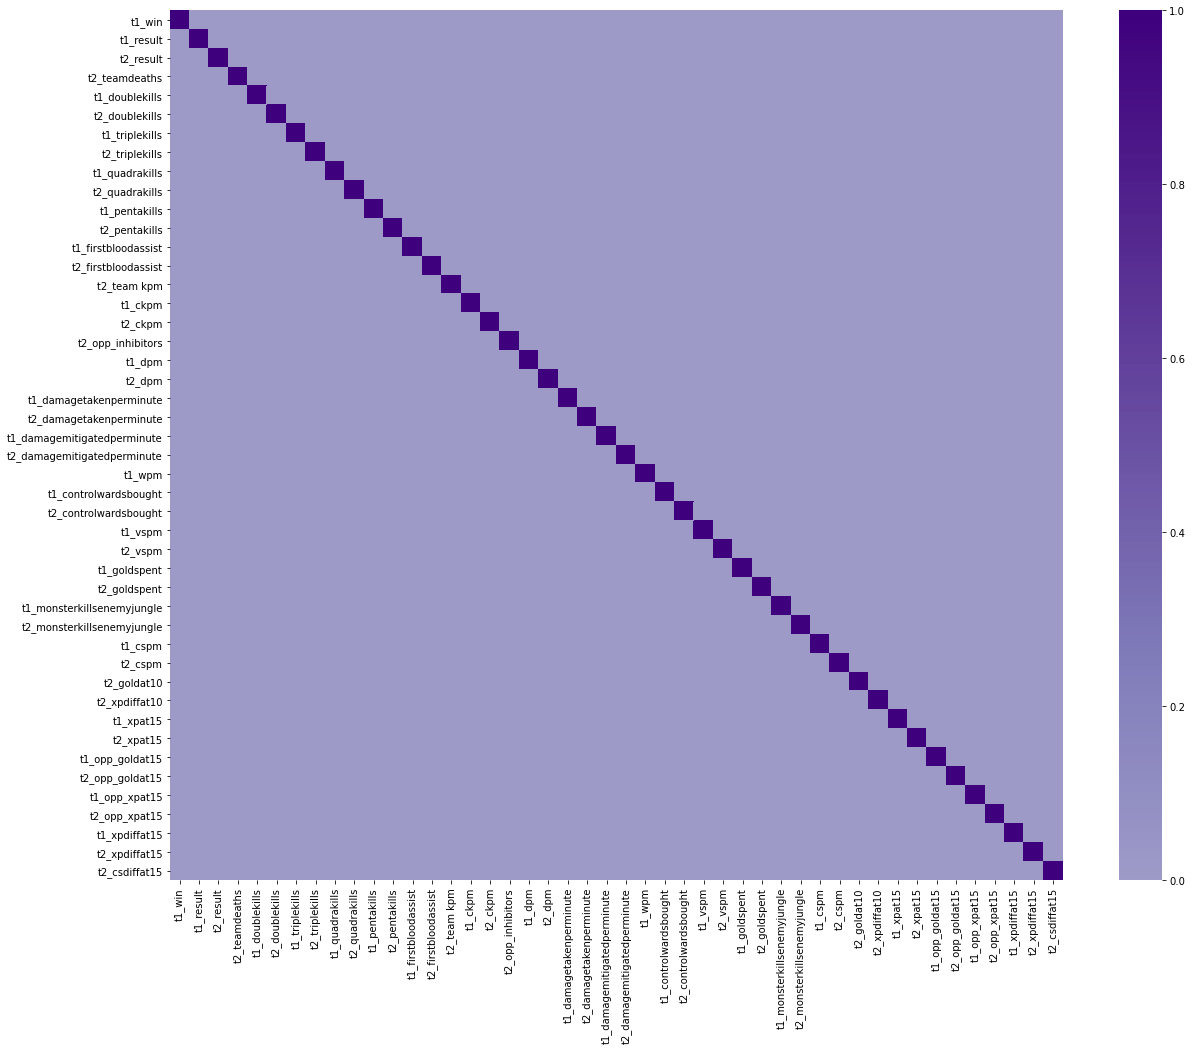

In [86]:
fig = plt.figure(figsize=(20,16))

sns.heatmap(abs(df1.corr() > 0.7), center=0, cmap='Purples')
plt.show()

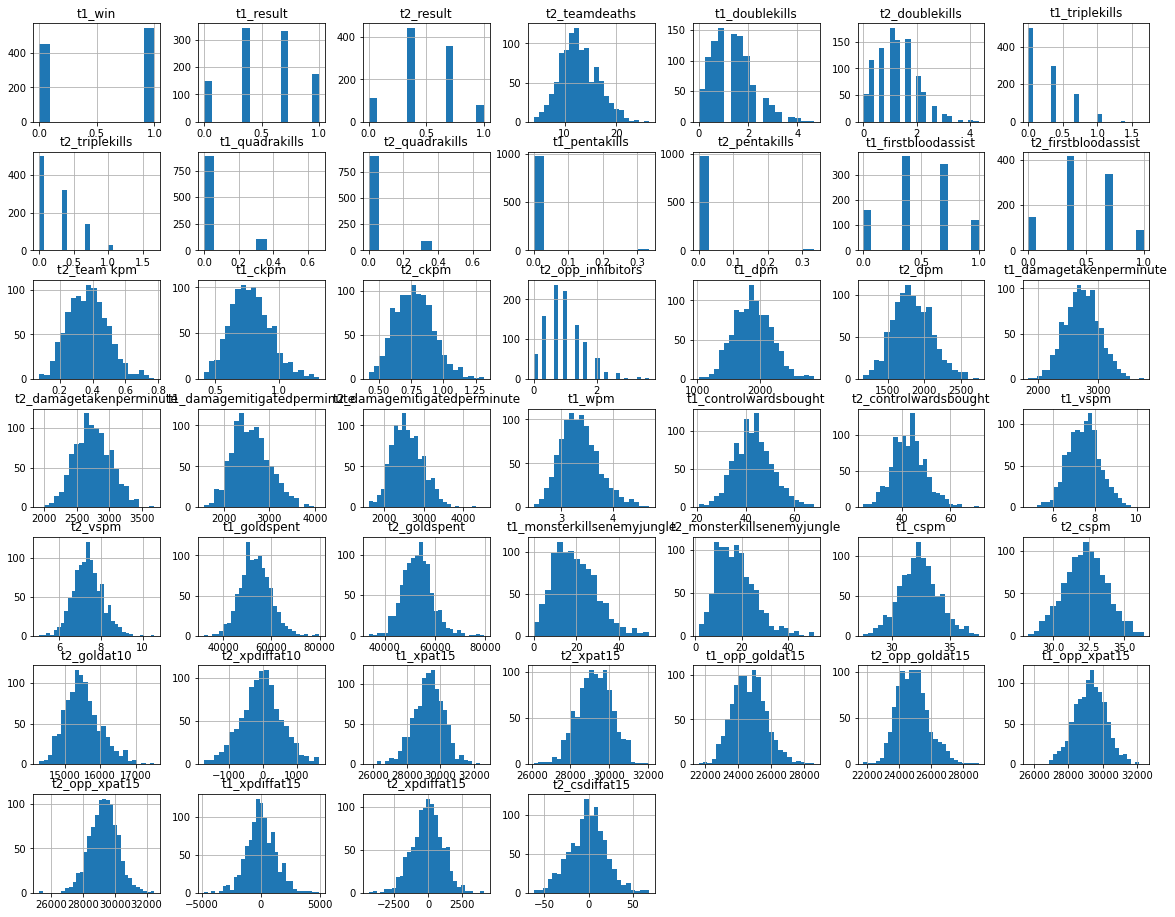

In [87]:
df1.hist(bins='auto', figsize=(20,16));

In [88]:
dbl = ['t1_doublekills', 't2_doublekills']
trp = ['t1_triplekills', 't2_triplekills']
quad = ['t1_quadrakills', 't2_quadrakills']
pent = ['t1_pentakills', 't2_pentakills']
mult = dbl + trp + quad + pent
mult

['t1_doublekills',
 't2_doublekills',
 't1_triplekills',
 't2_triplekills',
 't1_quadrakills',
 't2_quadrakills',
 't1_pentakills',
 't2_pentakills']

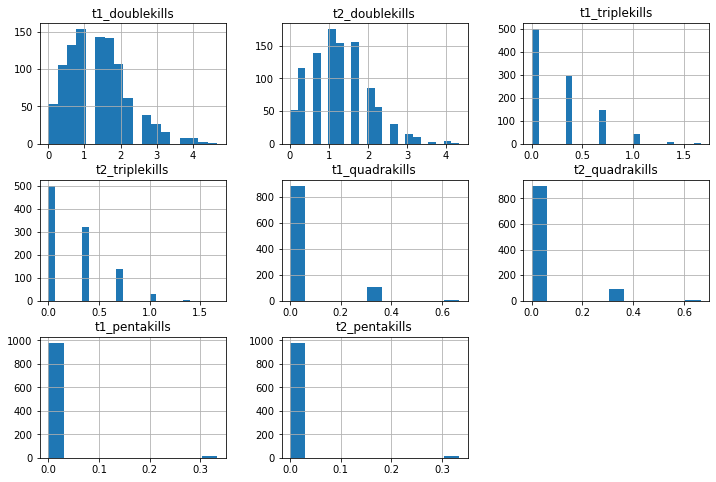

In [89]:
df1[mult].hist(bins='auto', figsize=(12,8));

In [90]:
for multi in mult:
    print(df1[multi].value_counts(normalize=True).sort_index(ascending=False))
    print("\n")

4.666667    0.001003
4.333333    0.002006
4.000000    0.007021
3.666667    0.008024
3.333333    0.016048
3.000000    0.027081
2.666667    0.039117
2.333333    0.061184
2.000000    0.107322
1.666667    0.141424
1.333333    0.143430
1.000000    0.154463
0.666667    0.132397
0.333333    0.106319
0.000000    0.053159
Name: t1_doublekills, dtype: float64


4.333333    0.001003
4.000000    0.004012
3.666667    0.003009
3.333333    0.011033
3.000000    0.015045
2.666667    0.030090
2.333333    0.056169
2.000000    0.085256
1.666667    0.155466
1.333333    0.154463
1.000000    0.176530
0.666667    0.139418
0.333333    0.116349
0.000000    0.052156
Name: t2_doublekills, dtype: float64


1.666667    0.002006
1.333333    0.006018
1.000000    0.043129
0.666667    0.148445
0.333333    0.297894
0.000000    0.502508
Name: t1_triplekills, dtype: float64


1.666667    0.001003
1.333333    0.003009
1.000000    0.031093
0.666667    0.139418
0.333333    0.322969
0.000000    0.502508
Name: t2_triplekills, 

quad and pent have 90+% 0 values so drop
dbl and trip have at least 50% non-zero values

In [91]:
drop_multi = quad + pent
df2 = df1.drop(columns= drop_multi, axis=1)

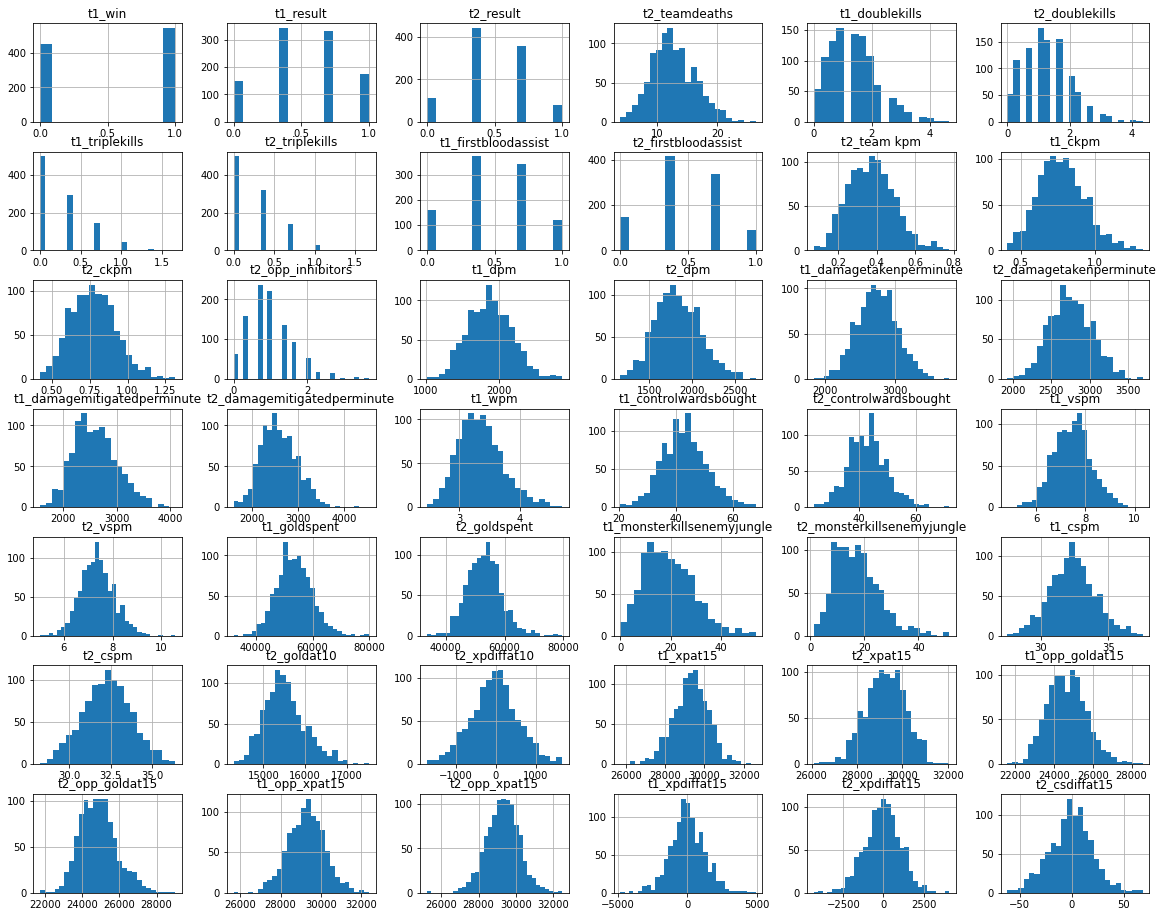

In [92]:
df2.hist(bins='auto', figsize=(20,16));

In [93]:
df2.dtypes

team1_team                      object
team2_team                      object
t1_win                           int64
t1_result                      float64
t2_result                      float64
t2_teamdeaths                  float64
t1_doublekills                 float64
t2_doublekills                 float64
t1_triplekills                 float64
t2_triplekills                 float64
t1_firstbloodassist            float64
t2_firstbloodassist            float64
t2_team kpm                    float64
t1_ckpm                        float64
t2_ckpm                        float64
t2_opp_inhibitors              float64
t1_dpm                         float64
t2_dpm                         float64
t1_damagetakenperminute        float64
t2_damagetakenperminute        float64
t1_damagemitigatedperminute    float64
t2_damagemitigatedperminute    float64
t1_wpm                         float64
t1_controlwardsbought          float64
t2_controlwardsbought          float64
t1_vspm                  

# Encoding Categorical Features

In [94]:
feats = df2.iloc[:, 2:]

In [95]:
t1 = pd.get_dummies(df2['team1_team'], prefix='t1_', dtype=np.int64)
t2 = pd.get_dummies(df2['team2_team'], prefix='t2_', dtype=np.int64)
df3 = pd.concat([t1, t2, feats], axis=1)
df3

,t1__100 Thieves,t1__Afreeca Freecs,t1__Alpha Esports,t1__Berjaya Dragons,t1__Bilibili Gaming,t1__Cloud9,t1__Counter Logic Gaming,t1__CrowCrowd,t1__DAMWON Gaming,t1__DRX,t1__Dignitas,t1__Dominus Esports,t1__Dragon Army,t1__EDward Gaming,t1__Elements Pro Gaming,t1__Evil Geniuses,t1__Excel Esports,t1__FC Schalke 04 Esports,t1__FlyQuest,t1__Fnatic,t1__FunPlus Phoenix,t1__G2 Esports,t1__Gambit Esports,t1__Gen.G,t1__Golden Guardians,t1__Hanwha Life Esports,t1__Hong Kong Attitude,t1__INTZ,t1__Immortals,t1__Invictus Gaming,t1__J Team,t1__JD Gaming,t1__KT Rolster,t1__LGD Gaming,t1__LNG Esports,t1__Legacy Esports,t1__Liyab Esports,t1__MAD Lions,t1__Machi Esports,t1__Misfits Gaming,t1__Nova Esports,t1__Oh My God,t1__One Breath Gaming,t1__Origen,t1__PSG Talon,t1__Rainbow7,t1__Resurgence,t1__RoX,t1__Rogue,t1__Rogue Warriors,t1__Royal Never Give Up,t1__SANDBOX Gaming,t1__SK Gaming,t1__SeolHaeOne Prince,t1__Suning,t1__SuperMassive Esports,t1__T1,t1__Team Dynamics,t1__Team Liquid,t1__Team SoloMid,t1__Team Vitality,t1__Team WE,t1__Top Esports,t1__Unicorns Of Love.CIS,t1__Vega Squadron,t1__Vici Gaming,t1__Victory Five,t1__ahq eSports Club,t1__eStar,t2__100 Thieves,t2__Afreeca Freecs,t2__Alpha Esports,t2__Berjaya Dragons,t2__Bilibili Gaming,t2__Cloud9,t2__Counter Logic Gaming,t2__CrowCrowd,t2__DAMWON Gaming,t2__DRX,t2__Dignitas,t2__Dominus Esports,t2__Dragon Army,t2__EDward Gaming,t2__Elements Pro Gaming,t2__Evil Geniuses,t2__Excel Esports,t2__FC Schalke 04 Esports,t2__FlyQuest,t2__Fnatic,t2__FunPlus Phoenix,t2__G2 Esports,t2__Gambit Esports,t2__Gen.G,t2__Golden Guardians,t2__Hanwha Life Esports,t2__Hong Kong Attitude,t2__INTZ,t2__Immortals,t2__Invictus Gaming,t2__J Team,t2__JD Gaming,t2__KT Rolster,t2__LGD Gaming,t2__LNG Esports,t2__Legacy Esports,t2__Liyab Esports,t2__MAD Lions,t2__Machi Esports,t2__Misfits Gaming,t2__Nova Esports,t2__Oh My God,t2__One Breath Gaming,t2__Origen,t2__PSG Talon,t2__Rainbow7,t2__Resurgence,t2__RoX,t2__Rogue,t2__Rogue Warriors,t2__Royal Never Give Up,t2__SANDBOX Gaming,t2__SK Gaming,t2__SeolHaeOne Prince,t2__Suning,t2__SuperMassive Esports,t2__T1,t2__Team Dynamics,t2__Team Liquid,t2__Team SoloMid,t2__Team Vitality,t2__Team WE,t2__Top Esports,t2__Unicorns Of Love.CIS,t2__V3 Esports,t2__Vega Squadron,t2__Vici Gaming,t2__Victory Five,t2__ahq eSports Club,t2__eStar,t1_win,t1_result,t2_result,t2_teamdeaths,t1_doublekills,t2_doublekills,t1_triplekills,t2_triplekills,t1_firstbloodassist,t2_firstbloodassist,t2_team kpm,t1_ckpm,t2_ckpm,t2_opp_inhibitors,t1_dpm,t2_dpm,t1_damagetakenperminute,t2_damagetakenperminute,t1_damagemitigatedperminute,t2_damagemitigatedperminute,t1_wpm,t1_controlwardsbought,t2_controlwardsbought,t1_vspm,t2_vspm,t1_goldspent,t2_goldspent,t1_monsterkillsenemyjungle,t2_monsterkillsenemyjungle,t1_cspm,t2_cspm,t2_goldat10,t2_xpdiffat10,t1_xpat15,t2_xpat15,t1_opp_goldat15,t2_opp_goldat15,t1_opp_xpat15,t2_opp_xpat15,t1_xpdiffat15,t2_xpdiffat15,t2_csdiffat15
1118,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0.333333,0.000000,14.333333,0.666667,0.666667,0.000000,0.000000,0.666667,0.333333,0.302100,0.727900,0.716500,1.666667,1677.612967,1656.686867,2423.336667,3106.844533,2244.049067,2616.538900,3.614467,42.666667,45.333333,7.468767,6.965833,58005.333333,52527.666667,30.333333,13.333333,34.319333,30.265067,15207.333333,-1068.000000,30378.000000,29006.000000,24234.333333,25603.666667,29532.000000,29145.333333,846.000000,-139.333333,-31.333333
1117,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1.000000,0.333333,13.000000,0.666667,1.333333,0.000000,0.33

In [96]:
corr(df3)

,cc
pairs,


# Train Test Split

In [97]:
X = df3.drop('t1_win', axis=1)
y = df3['t1_win']

X_train, X_test, y_train, y_test = tts(X, y, test_size=0.2, random_state=123)

In [98]:
print(len(X_train), len(X_test), len(y_train), len(y_test))

797 200 797 200


# Comparing Models
## Baseline Logistic Regression

In [99]:
pipe_log = Pipeline([('mms', MinMaxScaler()),
                     ('log', LogisticRegression(random_state=123))])

pipe_log.fit(X_train, y_train)

pred = pipe_log.predict(X_test)
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.58      0.50      0.54        92
           1       0.62      0.69      0.66       108

    accuracy                           0.60       200
   macro avg       0.60      0.60      0.60       200
weighted avg       0.60      0.60      0.60       200



In [100]:
def cfm(model):
    '''
    
    Input: model after fitting to dataset
    
    Output: confusion matrix with TN, FP, FN, TP labeled, including raw and normalized values
    
    '''
    make_confusion_matrix(confusion_matrix(y_test, model.predict(X_test)),
                          group_names= ['True Neg', 'False Pos', 'False Neg', 'True Pos'],
                          categories='auto',
                          cmap='Purples',
                          title=f'Confusion Matrix',
                          figsize=(7,5))

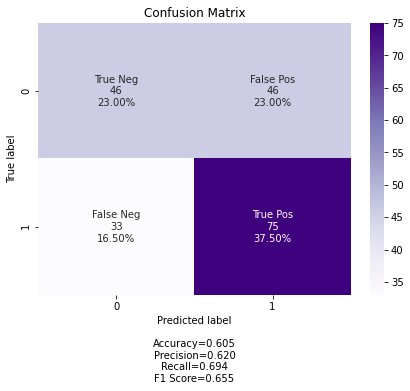

In [101]:
cfm(pipe_log)

## Baseline KNN

In [102]:
knn_pipe = Pipeline([('mms', MinMaxScaler()),
                      ('knn', KNeighborsClassifier(n_neighbors=7))])
knn_pipe.fit(X_train, y_train)
y_hat_test = knn_pipe.predict(X_test)
knn_pipe.score(X_test, y_test)

0.63

In [103]:
print(classification_report(y_test, knn_pipe.predict(X_test)))

              precision    recall  f1-score   support

           0       0.62      0.51      0.56        92
           1       0.64      0.73      0.68       108

    accuracy                           0.63       200
   macro avg       0.63      0.62      0.62       200
weighted avg       0.63      0.63      0.63       200



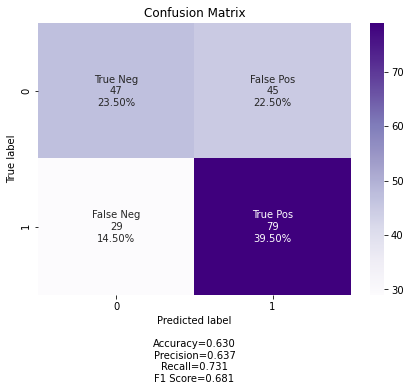

In [104]:
cfm(knn_pipe)

## Baseline SVM

In [105]:
pipe_svm = Pipeline([('mms', MinMaxScaler()),
                     ('clf', SVC(random_state=123))])

pipe_svm.fit(X_train, y_train)

pred = pipe_svm.predict(X_test)
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.61      0.45      0.52        92
           1       0.62      0.76      0.68       108

    accuracy                           0.61       200
   macro avg       0.61      0.60      0.60       200
weighted avg       0.61      0.61      0.60       200



In [106]:
pipe_svm.score(X_test, y_test)

0.615

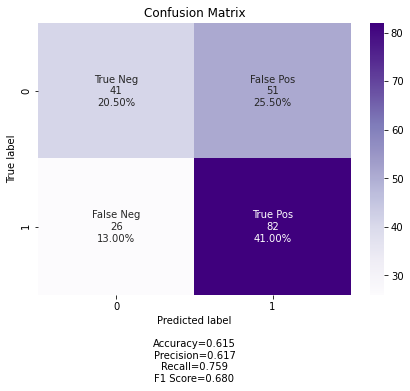

In [107]:
cfm(pipe_svm)

## Baseline Decision Tree Classifier

In [108]:
pipe_tree = Pipeline(steps=[('mms', MinMaxScaler()),
                            ('clf', DecisionTreeClassifier(random_state=123))])

pipe_tree.fit(X_train, y_train)
print(classification_report(y_test, pipe_tree.predict(X_test)))

              precision    recall  f1-score   support

           0       0.46      0.45      0.45        92
           1       0.54      0.56      0.55       108

    accuracy                           0.51       200
   macro avg       0.50      0.50      0.50       200
weighted avg       0.50      0.51      0.50       200



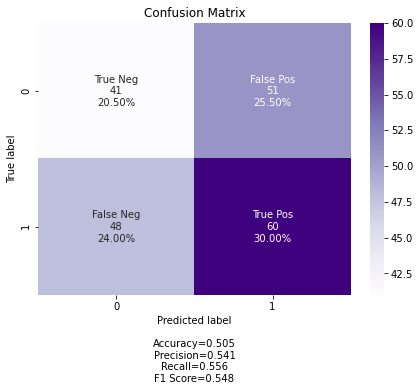

In [109]:
cfm(pipe_tree)

In [110]:
pipe_rf = Pipeline([('mms', MinMaxScaler()),
                    ('clf', RandomForestClassifier(random_state=123))])

pipe_rf.fit(X_train, y_train)
print(classification_report(y_test, pipe_rf.predict(X_test)))

              precision    recall  f1-score   support

           0       0.60      0.45      0.51        92
           1       0.61      0.75      0.67       108

    accuracy                           0.61       200
   macro avg       0.61      0.60      0.59       200
weighted avg       0.61      0.61      0.60       200



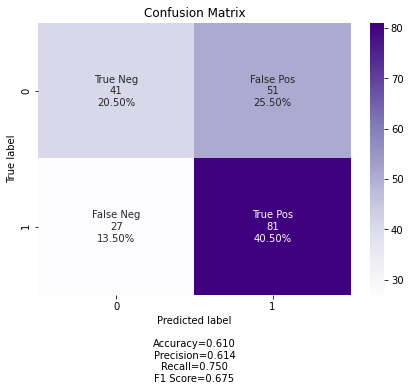

In [111]:
cfm(pipe_rf)

## Baseline AdaBoost

In [112]:
pipe_ada = Pipeline([('mms', MinMaxScaler()),
                    ('clf', AdaBoostClassifier(random_state=123))])

pipe_ada.fit(X_train, y_train)
print(classification_report(y_test, pipe_ada.predict(X_test)))

              precision    recall  f1-score   support

           0       0.57      0.50      0.53        92
           1       0.62      0.69      0.65       108

    accuracy                           0.60       200
   macro avg       0.60      0.59      0.59       200
weighted avg       0.60      0.60      0.60       200



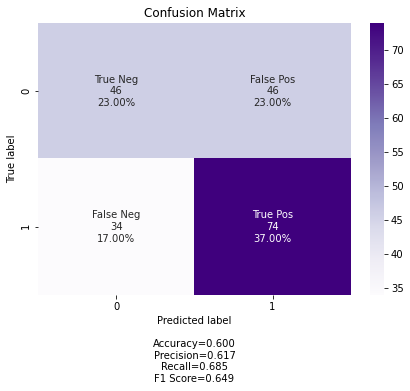

In [113]:
cfm(pipe_ada)

## Baseline Gradient Boosting Classifier

In [114]:
pipe_gbm = Pipeline([('clf', GradientBoostingClassifier(random_state=123))])

pipe_gbm.fit(X_train, y_train)
print(classification_report(y_test, pipe_gbm.predict(X_test)))

              precision    recall  f1-score   support

           0       0.58      0.48      0.52        92
           1       0.61      0.70      0.66       108

    accuracy                           0.60       200
   macro avg       0.60      0.59      0.59       200
weighted avg       0.60      0.60      0.59       200



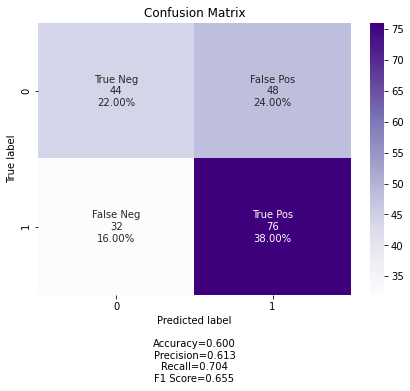

In [115]:
cfm(pipe_gbm)

In [116]:
pipe_xgb = Pipeline([('mms', MinMaxScaler()),
                    ('clf', XGBClassifier(random_state=123))])

pipe_xgb.fit(X_train, y_train)
print(classification_report(y_test, pipe_xgb.predict(X_test)))

              precision    recall  f1-score   support

           0       0.58      0.49      0.53        92
           1       0.62      0.70      0.66       108

    accuracy                           0.60       200
   macro avg       0.60      0.60      0.60       200
weighted avg       0.60      0.60      0.60       200



In [117]:
print(classification_report(y_test, pipe_xgb.predict(X_test)))

              precision    recall  f1-score   support

           0       0.58      0.49      0.53        92
           1       0.62      0.70      0.66       108

    accuracy                           0.60       200
   macro avg       0.60      0.60      0.60       200
weighted avg       0.60      0.60      0.60       200



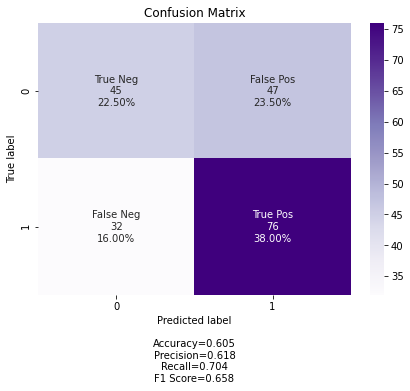

In [118]:
cfm(pipe_xgb)

In [122]:
models = [pipe_log, knn_pipe, pipe_svm, pipe_tree, pipe_rf, pipe_ada, pipe_gbm, pipe_xgb]
model_name = ['LogReg', 'KNN', 'SVC', 'Tree', 'RF', 'ADA', 'GBM', 'XGB']

In [120]:
def roc(models, names):
    '''
    
    Input: list of models, list of full model names
    
    Output: graph of ROC curves for each model, color coded with AUC values calculated in legend
    
    '''
    aucs = []
    fprs = []
    tprs = []

    for i, model in enumerate(models):
        try:
            y_score = model.decision_function(X_test)
            fpr, tpr, thresh = roc_curve(y_test, y_score)

        except AttributeError:
            y_score = model.predict_proba(X_test)
            fpr, tpr, thresh = roc_curve(y_test, y_score[:, 1])


        aucs.append(auc(fpr, tpr))
        fprs.append(fpr)
        tprs.append(tpr)
    #     print(f'{model_name[i]} Accuracy: {auc(fpr, tpr)}')

    plt.figure(figsize=(15, 12))
    lw = 2
    colors = ['darkorange', 'darkblue', 'green', 'red', 'yellow', 'grey', 'darkgreen', 'pink']

    for n in range(len(models)):
        plt.plot(fprs[n], tprs[n], color = colors[n],
                 lw=lw, label= f'{names[n]}, AUC: {round(aucs[n], 3)}')

    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.yticks([i/20.0 for i in range(21)])
    plt.xticks([i/20.0 for i in range(21)])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic (ROC) Curve')
    plt.legend(loc='lower right')
    plt.show()

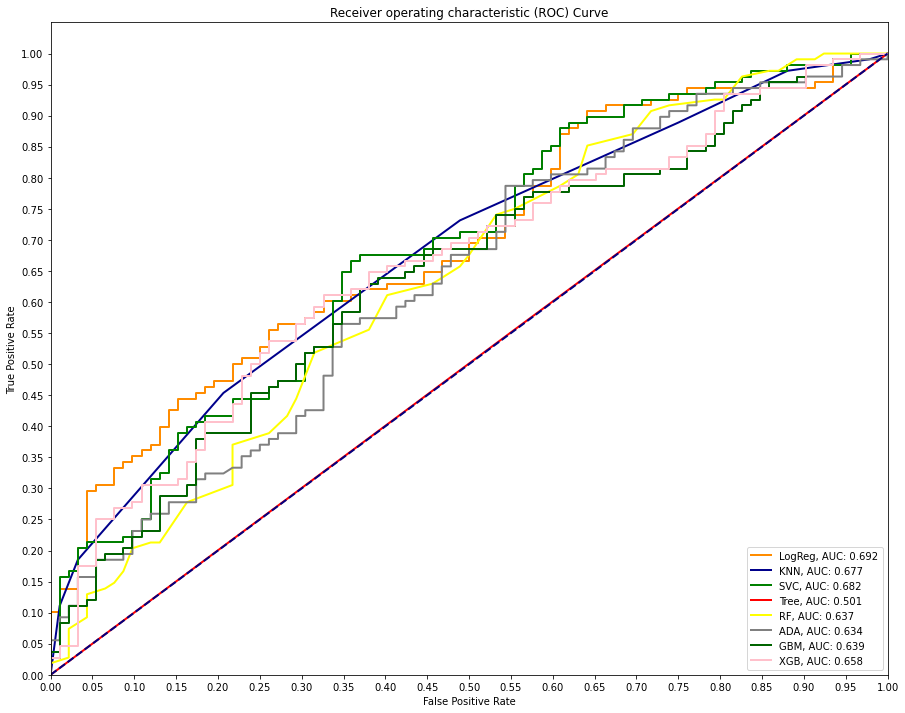

In [124]:
roc(models, model_name)

In [125]:
def compare_scores(models, names):
    '''
    
    Input: list of models, list of full model names
    
    Output: dataframe containing ACCURACY and F1 scores for each model, separated by TRAINING and TEST sets
    
    '''
    train_accs = []
    test_accs = []
    train_f1s = []
    test_f1s = []

    for model in models:

        model.fit(X_train, y_train)

        yhat_train = model.predict(X_train)
        yhat_test = model.predict(X_test)

        train_acc = accuracy_score(y_train, yhat_train)
        train_accs.append(round(train_acc, 3))

        test_acc = accuracy_score(y_test, yhat_test)
        test_accs.append(round(test_acc, 3))

        train_f1 = f1_score(y_train, yhat_train)
        train_f1s.append(round(train_f1, 3))

        test_f1 = f1_score(y_test, yhat_test)
        test_f1s.append(round(test_f1, 3))

    #     cm = confusion_matrix(y_test, yhat_test)
    model_scores = pd.DataFrame({'Model': names,
                                 'Training Accuracy': train_accs,
                                 'Testing Accuracy': test_accs,
                                 'Training F1 Score': train_f1s,
                                 'Testing F1 Score': test_f1s})
    
    return model_scores

In [126]:
model_scores = compare_scores(models, model_name)
model_scores

,Model,Training Accuracy,Testing Accuracy,Training F1 Score,Testing F1 Score
0,LogReg,0.769,0.605,0.798,0.655
1,KNN,0.758,0.630,0.784,0.681
2,SVC,0.785,0.615,0.819,0.680
3,Tree,1.000,0.505,1.000,0.548
4,RF,1.000,0.610,1.000,0.675
5,ADA,0.749,0.600,0.780,0.649
6,GBM,0.930,0.600,0.938,0.655
7,XGB,0.905,0.605,0.916,0.658


## Visualizing Decision Tree

The training accuracies and f1 scores for the `DecisionTreeClassifier()` and `RandomForestClassifier()` were 1.0 in both models. This result was not expected and needs to be investigated further. I believe that it may be a matter of the `max_depth` parameter not being set to anything (default is `None`). This is further supported by the testing accuracies and f1 scores for each of the respective models.

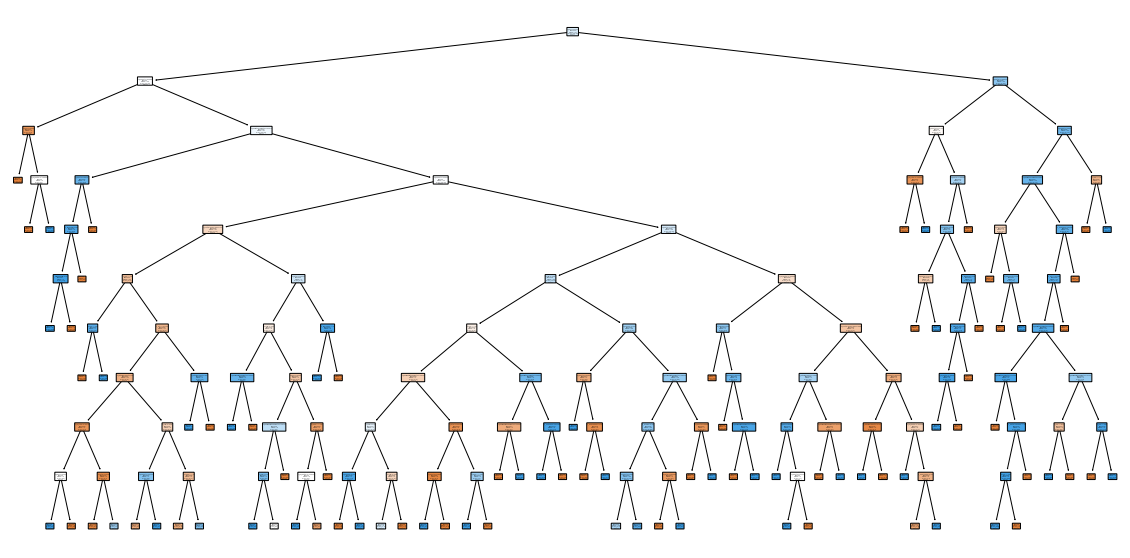

In [127]:
from sklearn.tree import plot_tree

plt.figure(figsize=(20,10))
tree = DecisionTreeClassifier(max_depth=10)
tree.fit(X_train, y_train)
plot_tree(tree, feature_names = X.columns,
          class_names=np.unique(y).astype('str'),
          filled=True, rounded=True)
plt.show()

In [128]:
tree.score(X_train, y_train)

0.8933500627352572

In [129]:
tree.score(X_test, y_test)

0.52

In [130]:
yhat_train = tree.predict(X_train)
yhat_test = tree.predict(X_test)

f1_score(y_train ,yhat_train), f1_score(y_test, yhat_test)

(0.907103825136612, 0.5932203389830508)

By setting a `max_depth` for the tree, I was able to prevent the tree from splitting until the leaves were pure. I will continue investigating the hyperparameters of the decision tree algorithm, followed by the random forest, until I can reach a training accuracy score between 0.75 and 0.9 as this would fall between the ranges of the other models.

In [131]:
for n in range(1,15):
    clf = DecisionTreeClassifier(max_depth=n)
    clf.fit(X_train, y_train)
    score = clf.score(X_train, y_train)
    print(f'Max depth: {n} -- Score: {score}') # max depth 7 - 10

Max depth: 1 -- Score: 0.5508155583437893
Max depth: 2 -- Score: 0.5771643663739021
Max depth: 3 -- Score: 0.5934755332496863
Max depth: 4 -- Score: 0.6612296110414053
Max depth: 5 -- Score: 0.698870765370138
Max depth: 6 -- Score: 0.7365119196988708
Max depth: 7 -- Score: 0.7829360100376411
Max depth: 8 -- Score: 0.8180677540777918
Max depth: 9 -- Score: 0.8670012547051443
Max depth: 10 -- Score: 0.8983688833124216
Max depth: 11 -- Score: 0.9284818067754078
Max depth: 12 -- Score: 0.9435382685069009
Max depth: 13 -- Score: 0.958594730238394
Max depth: 14 -- Score: 0.973651191969887


In [132]:
for n in range(3,10):
    clf = DecisionTreeClassifier(min_samples_leaf=n)
    clf.fit(X_train, y_train)
    score = clf.score(X_train, y_train)
    print(f'Min Samples Leaf: {n} -- Score: {score}') # min samples 4 - 9

Min Samples Leaf: 3 -- Score: 0.93099121706399
Min Samples Leaf: 4 -- Score: 0.8983688833124216
Min Samples Leaf: 5 -- Score: 0.8745294855708908
Min Samples Leaf: 6 -- Score: 0.8557089084065245
Min Samples Leaf: 7 -- Score: 0.8469259723964868
Min Samples Leaf: 8 -- Score: 0.8343789209535759
Min Samples Leaf: 9 -- Score: 0.8180677540777918


# Improving Baseline Models using GridSearchCV

## Decision Tree GS

In [133]:
pipe_tree1 = Pipeline([('tree', DecisionTreeClassifier(random_state=123))])

params_grid = [{'tree__max_depth': [8, 9, 10, 11, 12],
                'tree__min_samples_leaf': [6, 7, 8],
                'tree__max_features': [None, 'log2']}]

gs_tree = GridSearchCV(pipe_tree1,
                       param_grid = params_grid,
                       scoring = 'accuracy',
                       cv=5, return_train_score=True)

gs_tree.fit(X_train, y_train)
gs_tree.best_params_

{'tree__max_depth': 10,
 'tree__max_features': 'log2',
 'tree__min_samples_leaf': 7}

In [134]:
gs_tree.score(X_train ,y_train)

0.7063989962358845

In [135]:
model_scores

,Model,Training Accuracy,Testing Accuracy,Training F1 Score,Testing F1 Score
0,LogReg,0.769,0.605,0.798,0.655
1,KNN,0.758,0.630,0.784,0.681
2,SVC,0.785,0.615,0.819,0.680
3,Tree,1.000,0.505,1.000,0.548
4,RF,1.000,0.610,1.000,0.675
5,ADA,0.749,0.600,0.780,0.649
6,GBM,0.930,0.600,0.938,0.655
7,XGB,0.905,0.605,0.916,0.658


In [136]:
gs_tree.fit(X_train, y_train)
yhat_train = gs_tree.predict(X_train)
yhat_test = gs_tree.predict(X_test)

f1_score(y_train ,yhat_train), f1_score(y_test, yhat_test) # these results look much better

(0.720763723150358, 0.6082949308755761)

## Random Forest GS

In [137]:
for n in range(1,15):
    clf = RandomForestClassifier(max_depth=n)
    clf.fit(X_train, y_train)
    score = clf.score(X_train, y_train)
    print(f'Max depth: {n} -- Score: {score}') # max depth 5 - 7

Max depth: 1 -- Score: 0.5872020075282308
Max depth: 2 -- Score: 0.6235884567126725
Max depth: 3 -- Score: 0.6813048933500627
Max depth: 4 -- Score: 0.7239648682559598
Max depth: 5 -- Score: 0.7779171894604768
Max depth: 6 -- Score: 0.8368883312421581
Max depth: 7 -- Score: 0.8983688833124216
Max depth: 8 -- Score: 0.9523212045169385
Max depth: 9 -- Score: 0.9824341279799247
Max depth: 10 -- Score: 0.9924717691342535
Max depth: 11 -- Score: 1.0
Max depth: 12 -- Score: 1.0
Max depth: 13 -- Score: 1.0
Max depth: 14 -- Score: 1.0


In [138]:
for n in range(8,20):
    clf = RandomForestClassifier(min_samples_leaf=n)
    clf.fit(X_train, y_train)
    score = clf.score(X_train, y_train)
    print(f'Min samples leaf: {n} -- Score: {score}') # max depth 5 - 7

Min samples leaf: 8 -- Score: 0.8920953575909661
Min samples leaf: 9 -- Score: 0.8544542032622334
Min samples leaf: 10 -- Score: 0.8544542032622334
Min samples leaf: 11 -- Score: 0.8456712672521958
Min samples leaf: 12 -- Score: 0.8092848180677541
Min samples leaf: 13 -- Score: 0.7979924717691342
Min samples leaf: 14 -- Score: 0.7766624843161857
Min samples leaf: 15 -- Score: 0.7854454203262233
Min samples leaf: 16 -- Score: 0.7578419071518193
Min samples leaf: 17 -- Score: 0.766624843161857
Min samples leaf: 18 -- Score: 0.7490589711417817
Min samples leaf: 19 -- Score: 0.7377666248431619


In [139]:
pipe_rf1 = Pipeline([('rf', RandomForestClassifier(random_state=123))])

grid = [{'rf__max_depth': [3, 4, 5],
         'rf__min_samples_leaf': [8, 9, 10],
         'rf__max_features': [None, 'sqrt']}]

gs_rf = GridSearchCV(pipe_rf1,
                     param_grid = grid,
                     scoring='accuracy',
                     cv=5)
gs_rf.fit(X_train, y_train)
gs_rf.best_params_

{'rf__max_depth': 4, 'rf__max_features': 'sqrt', 'rf__min_samples_leaf': 9}

In [140]:
gs_rf.score(X_train, y_train)

0.698870765370138

## Logistic Regression GS

In [141]:
pipe_log1 = Pipeline([('mms', MinMaxScaler()),
                      ('log', LogisticRegression(random_state=123))])

grid = [{'log__C': [1, 10, 100, 1000, 10000],
         'log__max_iter': [100, 200, 300]}]

gs_log = GridSearchCV(pipe_log1,
                      param_grid=grid,
                      scoring='accuracy',
                      cv=5)
gs_log.fit(X_train, y_train)
gs_log.best_params_

{'log__C': 100, 'log__max_iter': 200}

In [142]:
gs_log.score(X_train, y_train)

0.7979924717691342

## K Neighbors Classifier GS

In [143]:
pipe_knn1 = Pipeline([('mms', MinMaxScaler()),
                      ('knn', KNeighborsClassifier())])

grid = [{'knn__n_neighbors': [3, 5, 7, 9, 11, 13, 15],
#          'knn__weights': ['uniform', 'distance'],
         'knn__leaf_size': [20]}]

gs_knn = GridSearchCV(pipe_knn1,
                      param_grid=grid,
                      scoring='accuracy',
                      cv=5)
gs_knn.fit(X_train, y_train)
gs_knn.best_params_

{'knn__leaf_size': 20, 'knn__n_neighbors': 5}

In [144]:
gs_knn.score(X_train, y_train)

0.7603513174404015

## SVM GS

In [145]:
pipe_svm1 = Pipeline([('mms', MinMaxScaler()),
                      ('svc', SVC(random_state=123))])

grid = [{'svc__C': [0.1, 1, 10],
         'svc__kernel': ['linear', 'poly'],
         'svc__gamma': ['auto', 'scale'],
         'svc__coef0': [0, 1, 2]}]

gs_svm = GridSearchCV(pipe_svm1,
                      param_grid=grid,
                      scoring='accuracy',
                      cv=5, refit=True)
gs_svm.fit(X_train, y_train)
gs_svm.best_params_

{'svc__C': 0.1, 'svc__coef0': 2, 'svc__gamma': 'scale', 'svc__kernel': 'poly'}

In [146]:
gs_svm.score(X_train, y_train)

0.7879548306148055

In [147]:
# gs_svm.fit(X_train, y_train)
yhat_train = gs_svm.predict(X_train)
yhat_test = gs_svm.predict(X_test)

f1_score(y_train ,yhat_train), f1_score(y_test, yhat_test) # these results look much better

(0.8148959474260679, 0.6694915254237289)

The rbf kernel was omitted from the grid search as it would cause the model to overfit. The resulting training accuracy score would always be a perfect `1.0`.

## ADA GS

In [148]:
pipe_ada1 = Pipeline([('mms', MinMaxScaler()),
                      ('ada', AdaBoostClassifier(random_state=123))])

grid = [{'ada__n_estimators': [50, 100, 200],
         'ada__learning_rate': [0.01, 0.1, 0.2, 0.5]}]

gs_ada = GridSearchCV(pipe_ada1,
                      param_grid=grid,
                      scoring='accuracy',
                      cv=5, refit=True)
gs_ada.fit(X_train, y_train)
gs_ada.best_params_

{'ada__learning_rate': 0.1, 'ada__n_estimators': 100}

In [149]:
gs_ada.score(X_train, y_train)

0.7214554579673776

In [150]:
yhat_train = gs_ada.predict(X_train)
yhat_test = gs_ada.predict(X_test)

f1_score(y_train ,yhat_train), f1_score(y_test, yhat_test) # these results look much better

(0.7623126338329764, 0.6776859504132231)

## GradientBoost GS

In [151]:
pipe_gb1 = Pipeline([('gb', GradientBoostingClassifier(random_state=123))])

grid = [{'gb__n_estimators': [100],
         'gb__learning_rate': [0.1, 0.5],
#          'gb__loss': ['deviance', 'exponential'],
         'gb__min_samples_leaf': [6, 7, 8],
         'gb__min_samples_split': [4, 5, 6]}]

gs_gb = GridSearchCV(pipe_gb1,
                     param_grid=grid,
                     scoring='accuracy',
                     cv=5)
gs_gb.fit(X_train, y_train)
gs_gb.best_params_

{'gb__learning_rate': 0.1,
 'gb__min_samples_leaf': 6,
 'gb__min_samples_split': 4,
 'gb__n_estimators': 100}

In [152]:
gs_gb.score(X_train, y_train)

0.918444165621079

In [153]:
yhat_train = gs_gb.predict(X_train)
yhat_test = gs_gb.predict(X_test)

f1_score(y_train, yhat_train), f1_score(y_test, yhat_test)

(0.9281767955801106, 0.6127659574468085)

In [154]:
pipe_xg1 = Pipeline([('xg', XGBClassifier(random_state=123))])

grid = [{'xg__learning_rate': [0.1, 0.2, 1],
         'xg__max_depth': [3, 4, 5, 6],
         'xg__n_estimators': [50, 100]}]

gs_xg = GridSearchCV(pipe_xg1,
                     param_grid=grid,
                     scoring='accuracy', 
                     cv=5)
gs_xg.fit(X_train, y_train)
gs_xg.best_params_

{'xg__learning_rate': 0.1, 'xg__max_depth': 4, 'xg__n_estimators': 100}

In [155]:
gs_xg.score(X_train, y_train)

0.9786700125470514

In [156]:
yhat_train = gs_xg.predict(X_train)
yhat_test = gs_xg.predict(X_test)

f1_score(y_train, yhat_train), f1_score(y_test, yhat_test)

(0.9807474518686297, 0.6271186440677967)

In [157]:
model_scores

,Model,Training Accuracy,Testing Accuracy,Training F1 Score,Testing F1 Score
0,LogReg,0.769,0.605,0.798,0.655
1,KNN,0.758,0.630,0.784,0.681
2,SVC,0.785,0.615,0.819,0.680
3,Tree,1.000,0.505,1.000,0.548
4,RF,1.000,0.610,1.000,0.675
5,ADA,0.749,0.600,0.780,0.649
6,GBM,0.930,0.600,0.938,0.655
7,XGB,0.905,0.605,0.916,0.658


In [158]:
gs_models = [gs_log, gs_knn, gs_svm, gs_tree, gs_rf, gs_ada, gs_gb, gs_xg]
gs_names = ['Logistic Regression', 'K Nearest Neighbors',
            'Support Vector Machines', 'Decision Tree',
            'Random Forest', 'AdaBoost', 'Gradient Boost',
            'XGBoost']

In [159]:
gs_results = compare_scores(gs_models, gs_names)
gs_results

,Model,Training Accuracy,Testing Accuracy,Training F1 Score,Testing F1 Score
0,Logistic Regression,0.798,0.610,0.819,0.655
1,K Nearest Neighbors,0.760,0.640,0.787,0.687
2,Support Vector Machines,0.788,0.610,0.815,0.669
3,Decision Tree,0.706,0.575,0.721,0.608
4,Random Forest,0.699,0.605,0.768,0.706
5,AdaBoost,0.721,0.610,0.762,0.678
6,Gradient Boost,0.918,0.545,0.928,0.613
7,XGBoost,0.979,0.560,0.981,0.627


In [160]:
gs_results.style.background_gradient(cmap='Purples')

,Model,Training Accuracy,Testing Accuracy,Training F1 Score,Testing F1 Score
0,Logistic Regression,0.798000,0.610000,0.819000,0.655000
1,K Nearest Neighbors,0.760000,0.640000,0.787000,0.687000
2,Support Vector Machines,0.788000,0.610000,0.815000,0.669000
3,Decision Tree,0.706000,0.575000,0.721000,0.608000
4,Random Forest,0.699000,0.605000,0.768000,0.706000
5,AdaBoost,0.721000,0.610000,0.762000,0.678000
6,Gradient Boost,0.918000,0.545000,0.928000,0.613000
7,XGBoost,0.979000,0.560000,0.981000,0.627000


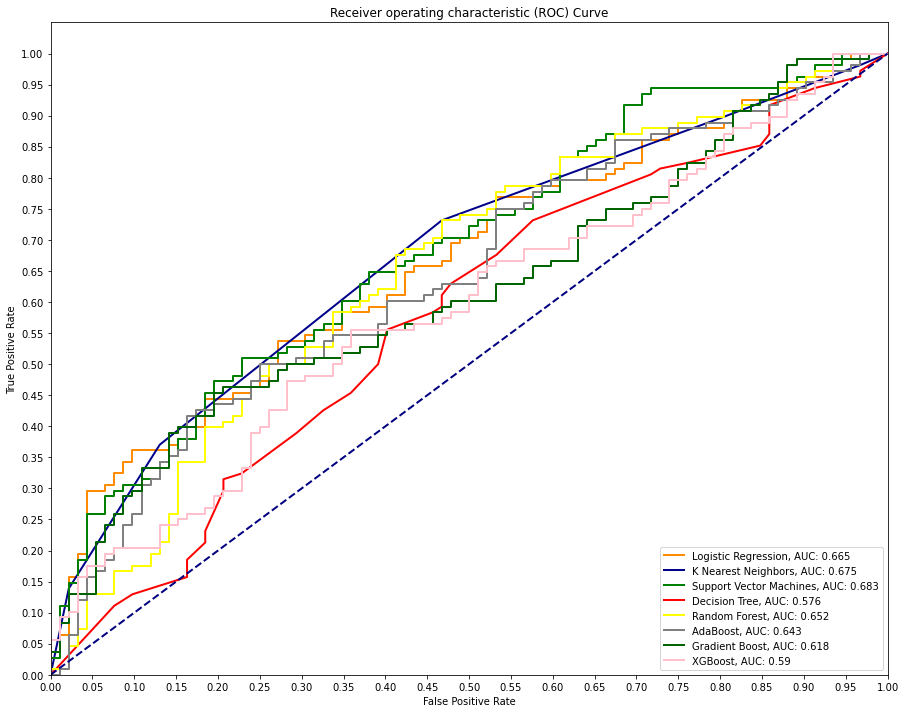

In [161]:
roc(gs_models, gs_names)

K-Neighbors


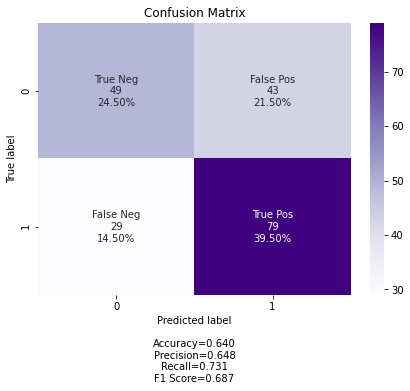

In [162]:
print('K-Neighbors')
cfm(gs_knn)

SVM


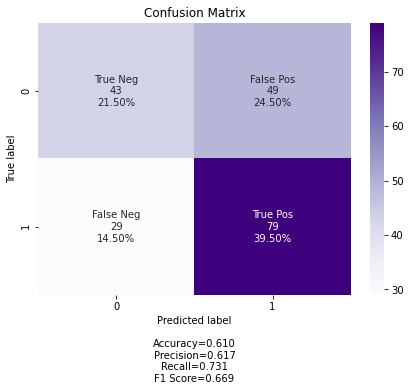

In [163]:
print('SVM')
cfm(gs_svm)

# Results

- Gradient boosting and XGBoosting performed the best on the training set but was the worst performing models on the testing set in terms of accuracy
    - Most likely due to overfitting of the training data
- Logistic regression, K-neighbors, and the support vector classifiers performed the most balanced on the test and training sets
- KNN and SVM classifiers had the highest AUC values
- KNN correctly classified 6 more negative results than SVM 
- KNN has the best overall performance. This model was designed to predict the outcome of a match at the World Championships for League of Legends. The results are balanced as there is always a winner and a loser. Therefore, a model with a high testing accuracy would be ideal to use when trying to predict the winner of a match.

Ultimately, this model can predict the results of a match at the 2020 League of Legends World Championship with an accuracy of 64%. That is an improvement from a coin flip, but not by very much. I would not be very comfortable deploying this model as it is now to a potential business partner or client. Although this year's tournament has concluded, this notebook can be used as a starting point for any future match prediction algorithms for League of Legends.

# Areas of Improvement, Future Work

To further improve the results of this project in the future, I will:
- increase the amount of match data used
    - By limiting the data to only the matches played by the teams participating at the tournament, I reduced the total amount of available data significantly.
- improve the `create_avg()` function
    - Originally, this function was supposed to be used to iterate through $n$ games to find the best results. However, the function itself takes too much time to complete one iteration. This function can easily be improved by removing the nested loops. The method that some variables are stored and retrieved can be altered to improve the run time as well.
- tune the parameters again once more data is available
    - The baseline tree and random forest models were set to the default parameters. This led to both of them overfitting to the training data and not performing very well at all on the test data.